
## ※ Problem Statement


 In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 To reduce customer churn,telecom companies need to predict which customers are at high risk of churn.

 In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


### Data Preparation

 The following data preparation steps are crucial for this problem:

         1.Derive new features
         2.Filter high-value customers
         3.Tag churners and remove attributes of the churn phase

### Modelling

 Need two models, one with good predictions and other with good interpretability.
 
         1.Use PCA to reduce the variables.

         2.Handle the imbalance class.



### Import all necessary libraries

In [5]:
import pandas as pd
import numpy as np
#import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
from  plotly.offline import plot
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib
import pandas as pd
import datetime as dt
import scipy.stats 
from scipy.stats import spearmanr as spearman
from scipy.stats import kendalltau as kendall
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import kstest
import random

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

# import classes for imputation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# import extra classes for modelling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)
# Imporing SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
pd.set_option('display.max_columns', 500)

### ⨳ Reading the data

In [7]:
data = pd.read_csv(r'C:\Users\Owner\Desktop\telecom churn case study\telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [8]:
data.shape

(99999, 226)

Data has 99999 rows and 266 columns.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [10]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [163]:
master_df = data.copy()

In [166]:
master_df

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109.0,0.0,0.0,0.0,1069.180,1201.640,1239.90375,57.84,54.68,52.2900,453.43,567.16,325.91,0.0,0.0,0.0,0.0,0.0,0.0,51.3900,31.3800,40.28000,308.63,447.38,162.28,13.20,13.725,12.45,0.0,0.000,0.000,422.160,533.91000,255.79000,4.300,23.29,12.01,49.89,31.76,49.14,0.0,0.0,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.0,0.0,4.500,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.490,121.1900,32.025,33.775,30.85,427.88,355.23,188.0400,25.9875,11.830,23.40,68.375,73.685,66.025,0.525,0.75,0.575,0.0,0.0,0.0,115.20,123.5725,109.86,626.46,558.04,428.740,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.125,0.2,5.0,5.0,7.0,1432.0,790.0,1502.0,335.0,335.0,379.5,0.0,0.0,310.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,14.0125,4.7125,0.0,1,1,0,1,0,0
7001524846,109.0,0.0,0.0,0.0,378.721,492.223,137.36200,413.69,351.03,35.0800,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,219.5775,217.5900,12.49000,80.96,70.58,50.54,0.00,0.000,0.00,0.0,0.000,0.275,378.090,288.18000,63.04000,116.560,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.000,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.980,15.4800,0.000,0.000,0.00,81.43,23.83,15.7900,0.0000,0.580,0.10,22.430,4.080,0.650,0.000,0.00,0.000,0.0,0.0,0.0,22.43,4.6600,0.75,103.86,28.49,16.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.000,40.0125,0.0300,0.0,4.2875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,14.0125,4.7125,0.0,0,1,1,1,1,0
7002191713,109.0,0.0,0.0,0.0,492.846,205.671,593.26000,501.76,108.39,534.2400,413.31,119.28,482.46,0.0,0.0,0.0,0.0,0.0,0.0,49.6300,6.1900,36.01000,151.13,47.28,294.46,4.54,0.000,12.45,0.0,0.000,0.275,205.310,53.48000,353.99000,4

In [11]:
print(data['mobile_number'].nunique())

99999


'mobile_number' has high Cardinality i.e. unique values = length of dataset, hence we can set mobile number as index.

In [12]:
data.set_index('mobile_number',inplace = True)

### ⨳Handling missing values

#### Handling missing values in columns

In [13]:
# Cheking percent of missing values in columns

rem =[]
for c in data.columns: 
    if data[c].isna().mean()*100>30:
        print(c,data[c].isna().mean()*100)
        
        rem.append(c)
rem

date_of_last_rech_data_6 74.84674846748467
date_of_last_rech_data_7 74.42874428744287
date_of_last_rech_data_8 73.66073660736608
date_of_last_rech_data_9 74.07774077740777
total_rech_data_6 74.84674846748467
total_rech_data_7 74.42874428744287
total_rech_data_8 73.66073660736608
total_rech_data_9 74.07774077740777
max_rech_data_6 74.84674846748467
max_rech_data_7 74.42874428744287
max_rech_data_8 73.66073660736608
max_rech_data_9 74.07774077740777
count_rech_2g_6 74.84674846748467
count_rech_2g_7 74.42874428744287
count_rech_2g_8 73.66073660736608
count_rech_2g_9 74.07774077740777
count_rech_3g_6 74.84674846748467
count_rech_3g_7 74.42874428744287
count_rech_3g_8 73.66073660736608
count_rech_3g_9 74.07774077740777
av_rech_amt_data_6 74.84674846748467
av_rech_amt_data_7 74.42874428744287
av_rech_amt_data_8 73.66073660736608
av_rech_amt_data_9 74.07774077740777
arpu_3g_6 74.84674846748467
arpu_3g_7 74.42874428744287
arpu_3g_8 73.66073660736608
arpu_3g_9 74.07774077740777
arpu_2g_6 74.846

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

### Delete the columns having more than 30% missing values

In [15]:
print("Original shape  : ",data.shape)
data = data.drop(rem, axis=1)
print("Shape After Dropping  : ",data.shape)


Original shape  :  (99999, 225)
Shape After Dropping  :  (99999, 185)


###### Deleting the date columns as the date columns are not required in our analysis

In [16]:
# List the date columns
print("Original shape  : ",data.shape)
date_cols = [k for k in data.columns if 'date' in k]
print(date_cols) 
# Dropping date columns
data = data.drop(date_cols, axis=1)
print("Shape After Dropping  : ",data.shape)

Original shape  :  (99999, 185)
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
Shape After Dropping  :  (99999, 177)


In [17]:
data.shape

(99999, 177)

After deleting the irrelevent columns we have reduced the number of clumns to 177.

### ⨳ Filter high-value customers

##### Creating column avg_rech_amt_6_7 average of total_rech_amt_6 total_rech_amt_7.

In [18]:
data['avg_rech_amt_6_7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

##### ✓ 70th percentile of avg_rech_amt_6_7

In [19]:
X = data['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

customers, who have recharged more than or equal to 70th percentile of avg_rech_amt_6_7

In [20]:
data = data[data['avg_rech_amt_6_7'] >= X]
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.

In [21]:
data.shape

(30011, 178)

##### there are around ~30K high value customers.

### ⨳ Handling missing values

In [22]:
# Count the rows with more than 70% of the values missing.
print(data.shape)
data.dropna(thresh=int(data.shape[1]*0.7),axis =0, inplace = True)
print(data.shape)

(30011, 178)
(29138, 178)


##### ✓ now Lets check how many columns have missing values in high value customers

In [23]:
for c in data.columns: 
    if round(data[c].isna().mean()*100,2)>0:
        print(c," : ",round(data[c].isna().mean()*100,2))
        


onnet_mou_6  :  0.39
onnet_mou_7  :  0.12
onnet_mou_8  :  0.44
onnet_mou_9  :  2.99
offnet_mou_6  :  0.39
offnet_mou_7  :  0.12
offnet_mou_8  :  0.44
offnet_mou_9  :  2.99
roam_ic_mou_6  :  0.39
roam_ic_mou_7  :  0.12
roam_ic_mou_8  :  0.44
roam_ic_mou_9  :  2.99
roam_og_mou_6  :  0.39
roam_og_mou_7  :  0.12
roam_og_mou_8  :  0.44
roam_og_mou_9  :  2.99
loc_og_t2t_mou_6  :  0.39
loc_og_t2t_mou_7  :  0.12
loc_og_t2t_mou_8  :  0.44
loc_og_t2t_mou_9  :  2.99
loc_og_t2m_mou_6  :  0.39
loc_og_t2m_mou_7  :  0.12
loc_og_t2m_mou_8  :  0.44
loc_og_t2m_mou_9  :  2.99
loc_og_t2f_mou_6  :  0.39
loc_og_t2f_mou_7  :  0.12
loc_og_t2f_mou_8  :  0.44
loc_og_t2f_mou_9  :  2.99
loc_og_t2c_mou_6  :  0.39
loc_og_t2c_mou_7  :  0.12
loc_og_t2c_mou_8  :  0.44
loc_og_t2c_mou_9  :  2.99
loc_og_mou_6  :  0.39
loc_og_mou_7  :  0.12
loc_og_mou_8  :  0.44
loc_og_mou_9  :  2.99
std_og_t2t_mou_6  :  0.39
std_og_t2t_mou_7  :  0.12
std_og_t2t_mou_8  :  0.44
std_og_t2t_mou_9  :  2.99
std_og_t2m_mou_6  :  0.39
std_og_t2m

In [24]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
data_null_mou_9 = data[(data['loc_og_t2m_mou_9'].isnull()) & (data['loc_ic_t2f_mou_9'].isnull()) & (data['roam_og_mou_9'].isnull()) & (data['std_ic_t2m_mou_9'].isnull()) &
  (data['loc_og_t2t_mou_9'].isnull()) & (data['std_ic_t2t_mou_9'].isnull()) & (data['loc_og_t2f_mou_9'].isnull()) & (data['loc_ic_mou_9'].isnull()) &
  (data['loc_og_t2c_mou_9'].isnull()) & (data['loc_og_mou_9'].isnull()) & (data['std_og_t2t_mou_9'].isnull()) & (data['roam_ic_mou_9'].isnull()) &
  (data['loc_ic_t2m_mou_9'].isnull()) & (data['std_og_t2m_mou_9'].isnull()) & (data['loc_ic_t2t_mou_9'].isnull()) & (data['std_og_t2f_mou_9'].isnull()) & 
  (data['std_og_t2c_mou_9'].isnull()) & (data['og_others_9'].isnull()) & (data['std_og_mou_9'].isnull()) & (data['spl_og_mou_9'].isnull()) & 
  (data['std_ic_t2f_mou_9'].isnull()) & (data['isd_og_mou_9'].isnull()) & (data['std_ic_mou_9'].isnull()) & (data['offnet_mou_9'].isnull()) & 
  (data['isd_ic_mou_9'].isnull()) & (data['ic_others_9'].isnull()) & (data['std_ic_t2o_mou_9'].isnull()) & (data['onnet_mou_9'].isnull()) & 
  (data['spl_ic_mou_9'].isnull())]

print(data_null_mou_9.shape)
data_null_mou_9.head(5)

(870, 178)


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.00,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
7000589828,109,0.0,0.0,0.0,374.863,294.023,183.043,0.000,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.2

In [25]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
mou_9 = [c for c in data.columns if 'mou_9' in c.lower()]
mou_9
data_null_mou_9 = data[data[mou_9].isna()]
print(data_null_mou_9.shape)
data_null_mou_9.head(5)

(29138, 178)


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7001524846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

##### ✓ It appears that MOU for all call types for the month of September (9) has missing values grouped together for any given record.
##### ✓ Check the data for the MOU for September (9), where these columns together lack values

In [26]:
# Adding missing indicator for these features
mou_9 = [c for c in data.columns if 'mou_9' in c.lower()]
mou_9
for c in mou_9:
    data[c].fillna(9999999999, inplace=True)

In [27]:
for c in mou_9:
    print(data[c].value_counts())

0.000000e+00    1556
1.000000e+10     870
2.600000e-01      16
1.010000e+00      14
3.500000e-01      14
                ... 
7.298600e+02       1
1.385800e+02       1
1.322300e+02       1
6.856100e+02       1
6.926300e+02       1
Name: onnet_mou_9, Length: 16672, dtype: int64
0.000000e+00    879
1.000000e+10    870
2.600000e-01     12
7.300000e-01      9
1.010000e+00      9
               ... 
1.241900e+02      1
4.131600e+02      1
2.366100e+02      1
1.012800e+02      1
3.789300e+02      1
Name: offnet_mou_9, Length: 20442, dtype: int64
0.000000e+00    22481
1.000000e+10      870
3.300000e-01       13
8.600000e-01       13
1.960000e+00       13
                ...  
3.309000e+01        1
3.911000e+01        1
4.429000e+01        1
5.110300e+02        1
6.396000e+01        1
Name: roam_ic_mou_9, Length: 3370, dtype: int64
0.000000e+00    22515
1.000000e+10      870
2.100000e-01       15
1.010000e+00       13
2.600000e-01       11
                ...  
4.085300e+02        1
2.273800e+

In [28]:
# Again Cheking percent of missing values in columns
rem = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
rem

,null
ic_others_9,2.99
og_others_9,2.99
isd_og_mou_8,0.44
std_og_t2m_mou_8,0.44
std_ic_t2o_mou_8,0.44
...,...
loc_ic_t2t_mou_9,0.00
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00


##### ✓ It appears that MOU has missing values for all call types for the months of August through August 8 together for any given record.
##### ✓ Let's look at the MOU records for August 8 to see if these columns have missing values combined.

In [29]:
#  columns of MOU Aug(8)
print(((rem[rem['null'] == 0.55]).index).to_list())

[]


In [30]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
data_null_mou_8 = data[(data['loc_og_t2m_mou_8'].isnull()) & (data['loc_ic_t2f_mou_8'].isnull()) & (data['roam_og_mou_8'].isnull()) & (data['std_ic_t2m_mou_8'].isnull()) &
  (data['loc_og_t2t_mou_8'].isnull()) & (data['std_ic_t2t_mou_8'].isnull()) & (data['loc_og_t2f_mou_8'].isnull()) & (data['loc_ic_mou_8'].isnull()) &
  (data['loc_og_t2c_mou_8'].isnull()) & (data['loc_og_mou_8'].isnull()) & (data['std_og_t2t_mou_8'].isnull()) & (data['roam_ic_mou_8'].isnull()) &
  (data['loc_ic_t2m_mou_8'].isnull()) & (data['std_og_t2m_mou_8'].isnull()) & (data['loc_ic_t2t_mou_8'].isnull()) & (data['std_og_t2f_mou_8'].isnull()) & 
  (data['std_og_t2c_mou_8'].isnull()) & (data['og_others_8'].isnull()) & (data['std_og_mou_8'].isnull()) & (data['spl_og_mou_8'].isnull()) & 
  (data['std_ic_t2f_mou_8'].isnull()) & (data['isd_og_mou_8'].isnull()) & (data['std_ic_mou_8'].isnull()) & (data['offnet_mou_8'].isnull()) & 
  (data['isd_ic_mou_8'].isnull()) & (data['ic_others_8'].isnull()) & (data['std_ic_t2o_mou_8'].isnull()) & (data['onnet_mou_8'].isnull()) & 
  (data['spl_ic_mou_8'].isnull())]

data_null_mou_8.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7002252754,109,0.0,0.0,0.0,580.477,111.878,0.000,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.00,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
7000248548,109,0.0,0.0,0.0,569.612,237.289,0.000,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.00,0.00,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,

In [31]:
# Adding missing indicator arbitrary value = '9999999999' for these features
mou_8 = [c for c in data.columns if 'mou_8' in c.lower()]
mou_8
for c in mou_8:
    data[c].fillna(9999999999, inplace=True)

In [32]:
# Again cheking percent of missing values in columns
rem = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
rem

,null
og_others_9,2.99
ic_others_9,2.99
ic_others_8,0.44
og_others_8,0.44
loc_ic_t2f_mou_6,0.39
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


#### ✓ It appears that MOU has missing values for all call types for the months of June and June 6 combined for any given record.

#### ✓  Check the MOU records for Jun-6 to see if these columns have missing data together.

In [33]:
# Listing the columns of MOU Jun(6)
print(((rem[rem['null'] == 0.44]).index).to_list())

['ic_others_8', 'og_others_8']


In [34]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
data_null_mou_6 = data[(data['loc_og_t2m_mou_6'].isnull()) & (data['loc_ic_t2f_mou_6'].isnull()) & (data['roam_og_mou_6'].isnull()) & (data['std_ic_t2m_mou_6'].isnull()) &
  (data['loc_og_t2t_mou_6'].isnull()) & (data['std_ic_t2t_mou_6'].isnull()) & (data['loc_og_t2f_mou_6'].isnull()) & (data['loc_ic_mou_6'].isnull()) &
  (data['loc_og_t2c_mou_6'].isnull()) & (data['loc_og_mou_6'].isnull()) & (data['std_og_t2t_mou_6'].isnull()) & (data['roam_ic_mou_6'].isnull()) &
  (data['loc_ic_t2m_mou_6'].isnull()) & (data['std_og_t2m_mou_6'].isnull()) & (data['loc_ic_t2t_mou_6'].isnull()) & (data['std_og_t2f_mou_6'].isnull()) & 
  (data['std_og_t2c_mou_6'].isnull()) & (data['og_others_6'].isnull()) & (data['std_og_mou_6'].isnull()) & (data['spl_og_mou_6'].isnull()) & 
  (data['std_ic_t2f_mou_6'].isnull()) & (data['isd_og_mou_6'].isnull()) & (data['std_ic_mou_6'].isnull()) & (data['offnet_mou_6'].isnull()) & 
  (data['isd_ic_mou_6'].isnull()) & (data['ic_others_6'].isnull()) & (data['std_ic_t2o_mou_6'].isnull()) & (data['onnet_mou_6'].isnull()) & 
  (data['spl_ic_mou_6'].isnull())]

data_null_mou_6.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001328263,109,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
7002168045,109,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0

In [35]:
# Deleting the records for which MOU for Jun(6) are null
data = data.drop(data_null_mou_6.index)

In [36]:
# Again cheking percent of missing values in columns
data_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_columns

,null
ic_others_9,3.00
og_others_9,3.00
ic_others_8,0.44
og_others_8,0.44
loc_ic_t2f_mou_7,0.12
...,...
isd_og_mou_9,0.00
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00


#### ✓ It appears that MOU for all call types for the month of July 7has missing values grouped together for any given record.

#### ✓ Let's look at the MOU records for July 7 to see which columns are missing values together.

In [37]:
# Listing the columns of MOU Jul(7)
print(((rem[rem['null'] == 0.12]).index).to_list())

['og_others_7', 'spl_og_mou_7', 'isd_og_mou_7', 'std_og_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'ic_others_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'isd_ic_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'roam_og_mou_7', 'loc_og_t2c_mou_7', 'roam_ic_mou_7', 'offnet_mou_7', 'onnet_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7']


In [38]:
# Adding missing indicator arbitrary value = 9999999999 for these features
mou_8 = [c for c in data.columns if 'mou_8' in c.lower()]
mou_8
for c in mou_8:
    data[c].fillna(9999999999 , inplace=True)

In [39]:
data.shape

(29023, 178)

In [40]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(data.index)/30011)),2)*100

3.0

#### ✓ Almost 3% of our records have been lost However, there are enough records for us to conduct our analysis.

### ⨳ Tagging users who churned

Now, based on the fourth month, tag the churned consumers as follows: 
Those who are in the churn phase but have not made any calls (incoming or outgoing) OR even accessed mobile internet once.**( Usage Based Churn )**


In [41]:
data['churn'] = np.where((data['total_ic_mou_9']==0) & (data['total_og_mou_9']==0) & (data['vol_2g_mb_9']==0) & (data['vol_3g_mb_9']==0), 1, 0)

In [42]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,1.000000e+10,453.43,567.16,325.91,1.000000e+10,16.23,33.49,31.64,1.000000e+10,23.74,12.59,38.06,1.000000e+10,51.39,31.38,40.28,1.000000e+10,308.63,447.38,162.28,1.000000e+10,62.13,55.14,53.23,1.000000e+10,0.0,0.0,0.00,1.000000e+10,422.16,533.91,255.79,1.000000e+10,4.30,23.29,12.01,1.000000e+10,49.89,31.76,49.14,1.000000e+10,6.66,20.08,16.68,1.000000e+10,0.0,0.0,0.0,1.000000e+10,60.86,75.14,77.84,1.000000e+10,0.0,0.18,10.01,1.000000e+10,4.50,0.00,6.50,1.000000e+10,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,1.000000e+10,217.56,221.49,121.19,1.000000e+10,152.16,101.46,39.53,1.000000e+10,427.88,355.23,188.04,1.000000e+10,36.89,11.83,30.39,1.000000e+10,91.44,126.99,141.33,1.000000e+10,52.19,34.24,22.21,1.000000e+10,0.0,0.0,0.0,1.000000e+10,180.54,173.08,193.94,1.000000e+10,626.46,558.04,428.74,0.00,0.21,0.0,0.0,1.000000e+10,2.06,14.53,31.59,1.000000e+10,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,3.346000

#### Deleting all the attributes corresponding to the churn phase

In [43]:
# List the columns for September's churn month.
col_9 = [col for col in data.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [44]:
# Deleting the churn month columns
data = data.drop(col_9, axis=1)

In [45]:
# Dropping sep_vbc_3g column
data = data.drop('sep_vbc_3g', axis=1)

In [46]:
data.shape

(29023, 136)

#### Checking churn percentage

In [47]:
print(" CHURN PERCENTAGE : ",round(100*(data['churn'].mean()),2))
data['churn'].value_counts()

 CHURN PERCENTAGE :  6.35


0    27180
1     1843
Name: churn, dtype: int64


There is **high imbalance** in data where churned customers are too small percentage **~ 6%**

### ⨳ Handling Outliers in Numerical columns

In [48]:
for c in data.columns : 
    data.loc[data[c] == 9999999999, c] = np.NaN

In [49]:
cols = data.columns
# find categorical variables
# those of type 'Object' in the dataset
cat_cols = [c for c in data.columns if data[c].nunique() <= 20 and c !='churn']

# find numerical variables
# those different from object and also excluding the target SalePrice
num_cols = [c for c in data.columns if data[c].nunique() > 20 and c !='churn']
target_col = 'churn'

In [50]:
for c in cat_cols:
    print(data[c].value_counts())

109.0    29023
Name: circle_id, dtype: int64
0.0    29023
Name: loc_og_t2o_mou, dtype: int64
0.0    29023
Name: std_og_t2o_mou, dtype: int64
0.0    29023
Name: loc_ic_t2o_mou, dtype: int64
0.0    29023
Name: std_og_t2c_mou_6, dtype: int64
0.0    28988
Name: std_og_t2c_mou_7, dtype: int64
0.0    28896
Name: std_og_t2c_mou_8, dtype: int64
0.0    29023
Name: std_ic_t2o_mou_6, dtype: int64
0.0    28988
Name: std_ic_t2o_mou_7, dtype: int64
0.0    28896
Name: std_ic_t2o_mou_8, dtype: int64
0.0    25743
1.0     2910
2.0      339
3.0       25
4.0        6
Name: monthly_2g_6, dtype: int64
0.0    25603
1.0     2985
2.0      401
3.0       28
4.0        4
5.0        2
Name: monthly_2g_7, dtype: int64
0.0    25967
1.0     2746
2.0      282
3.0       22
4.0        4
5.0        2
Name: monthly_2g_8, dtype: int64
0.0     25672
1.0      2405
2.0       628
3.0       191
4.0        71
5.0        29
6.0        10
7.0         9
8.0         3
9.0         2
11.0        2
14.0        1
Name: monthly_3g_6, dty

In [51]:
len(cat_cols)

16

In [52]:
len(num_cols) 

119

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29023 entries, 7000701601 to 7000498689
Columns: 136 entries, circle_id to churn
dtypes: float64(136)
memory usage: 30.3 MB


In [54]:
data.shape

(29023, 136)

### ✓ Function to find the skewed boundaries 

In [55]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [56]:
for col in num_cols : 
    upper_limit, lower_limit = find_skewed_boundaries(data, col, 1.5)
    print(col ,' - upper_limit : ', upper_limit, 'lower_limit : ', lower_limit)
    # Now let's replace the outliers by the maximum and minimum limit

    data[col]= np.where(data[col] > upper_limit, upper_limit,
                            data[col])
    
    
    data[col]= np.where(data[col] < lower_limit, lower_limit,
                            data[col])

arpu_6  - upper_limit :  1200.1515 lower_limit :  -137.2525
arpu_7  - upper_limit :  1201.6399999999999 lower_limit :  -131.01599999999996
arpu_8  - upper_limit :  1239.90375 lower_limit :  -259.77825000000007
onnet_mou_6  - upper_limit :  823.7800000000001 lower_limit :  -425.3400000000001
onnet_mou_7  - upper_limit :  854.96625 lower_limit :  -442.72375
onnet_mou_8  - upper_limit :  727.0174999999999 lower_limit :  -384.24249999999995
offnet_mou_6  - upper_limit :  1095.1125000000002 lower_limit :  -430.94750000000005
offnet_mou_7  - upper_limit :  1132.7612499999998 lower_limit :  -450.74874999999986
offnet_mou_8  - upper_limit :  1071.5187500000002 lower_limit :  -469.89125000000007
roam_ic_mou_6  - upper_limit :  0.0 lower_limit :  0.0
roam_ic_mou_7  - upper_limit :  0.0 lower_limit :  0.0
roam_ic_mou_8  - upper_limit :  0.0 lower_limit :  0.0
roam_og_mou_6  - upper_limit :  0.0 lower_limit :  0.0
roam_og_mou_7  - upper_limit :  0.0 lower_limit :  0.0
roam_og_mou_8  - upper_limit 

# ⨳ Feature Engineering

### ✓ Derive new features

In [57]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Creating the 'decrease_mou_action' new column
This column shows if the customer's use minutes have fallen from the good phase to the action phase.

In [58]:
# Total mou during the good phase for  incoming aswell as outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [59]:
# Avg. mou at action phase
# There are two months (7 and 8) left in the action phase, so we're using the average.
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] 
                              + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [60]:
# Difference between avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [61]:
# determining if the mou has decreased throughout the action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [62]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109.0,0.0,0.0,0.0,1069.180,1201.640,1239.90375,57.84,54.68,52.29,453.43,567.16,325.91,0.0,0.0,0.0,0.0,0.0,0.0,51.3900,31.38,40.28,308.63,447.38,162.28,13.20,13.725,12.45,0.0,0.0,0.000,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,0.0,0.0,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.0,0.0,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,32.025,33.775,30.85,427.88,355.23,188.04,25.9875,11.830,23.40,68.375,73.685,66.025,0.525,0.75,0.575,0.0,0.0,0.0,115.20,123.5725,109.86,626.46,558.04,428.740,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.125,0.2,5.0,5.0,7.0,1432.0,790.0,1502.0,335.0,335.0,379.5,0.0,0.0,310.0,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,14.0125,4.7125,0.0,1185.0,1.0,1113.99,973.0900,-140.9000,1
7001524846,109.0,0.0,0.0,0.0,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,219.5775,217.59,12.49,80.96,70.58,50.54,0.00,0.000,0.00,0.0,0.0,0.275,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.000,0.000,0.00,81.43,23.83,15.79,0.0000,0.580,0.10,22.430,4.080,0.650,0.000,0.00,0.000,0.0,0.0,0.0,22.43,4.6600,0.75,103.86,28.49,16.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,40.0125,0.03,0.0,4.2875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,14.0125,4.7125,0.0,519.0,0.0,612.22,324.1250,-288.0950,1
7002191713,109.0,0.0,0.0,0.0,492.846,205.671,593.26000,501.76,108.39,534.24,413.31,119.28,482.46,0.0,0.0,0.0,0.0,0.0,0.0,49.6300,6.19,36.01,151.13,47.28,294.46,4.54,0.000,12.45,0.0,0.0,0.275,205.31,53.48,353.99,446.410,85.98,357.30,255.36,52.94,156.94,0.0,0.0,0

#### Creating new column `decrease_rech_num_action`
This column shows if the customer's number of recharges have fallen in action phase then good phase.

In [63]:
# Avg rech number during the action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] +data['total_rech_num_8'])/2

In [64]:
# Difference between total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [65]:
# Difference between total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']# examining the action phase to see if rech num has reduced
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [66]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109.0,0.0,0.0,0.0,1069.180,1201.640,1239.90375,57.84,54.68,52.29,453.43,567.16,325.91,0.0,0.0,0.0,0.0,0.0,0.0,51.3900,31.38,40.28,308.63,447.38,162.28,13.20,13.725,12.45,0.0,0.0,0.000,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,0.0,0.0,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.0,0.0,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,32.025,33.775,30.85,427.88,355.23,188.04,25.9875,11.830,23.40,68.375,73.685,66.025,0.525,0.75,0.575,0.0,0.0,0.0,115.20,123.5725,109.86,626.46,558.04,428.740,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.125,0.2,5.0,5.0,7.0,1432.0,790.0,1502.0,335.0,335.0,379.5,0.0,0.0,310.0,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,14.0125,4.7125,0.0,1185.0,1.0,1113.99,973.0900,-140.9000,1,6.0,1.0,0
7001524846,109.0,0.0,0.0,0.0,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,219.5775,217.59,12.49,80.96,70.58,50.54,0.00,0.000,0.00,0.0,0.0,0.275,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.000,0.000,0.00,81.43,23.83,15.79,0.0000,0.580,0.10,22.430,4.080,0.650,0.000,0.00,0.000,0.0,0.0,0.0,22.43,4.6600,0.75,103.86,28.49,16.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,40.0125,0.03,0.0,4.2875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,14.0125,4.7125,0.0,519.0,0.0,612.22,324.1250,-288.0950,1,17.5,-1.5,1
7002191713,109.0,0.0,0.0,0.0,492.846,205.671,593.26000,501.76,108.39,534.24,413.31,119.28,482.46,0.0,0.0,0.0,0.0,0.0,0.0,49.6300,6.19,36.01,151.13,47.28,294.46,4.54,0.000,12.45,

#### Creating new column  `decrease_rech_amt_action`
This column shows if   the amount of recharge of the customer has decreased in the action phase than the good phase.

In [67]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] +data['total_rech_amt_8'])/2

In [68]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [69]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [70]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109.0,0.0,0.0,0.0,1069.180,1201.640,1239.90375,57.84,54.68,52.29,453.43,567.16,325.91,0.0,0.0,0.0,0.0,0.0,0.0,51.3900,31.38,40.28,308.63,447.38,162.28,13.20,13.725,12.45,0.0,0.0,0.000,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,0.0,0.0,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.0,0.0,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,32.025,33.775,30.85,427.88,355.23,188.04,25.9875,11.830,23.40,68.375,73.685,66.025,0.525,0.75,0.575,0.0,0.0,0.0,115.20,123.5725,109.86,626.46,558.04,428.740,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.125,0.2,5.0,5.0,7.0,1432.0,790.0,1502.0,335.0,335.0,379.5,0.0,0.0,310.0,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,14.0125,4.7125,0.0,1185.0,1.0,1113.99,973.0900,-140.9000,1,6.0,1.0,0,1146.0,-286.0,1
7001524846,109.0,0.0,0.0,0.0,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,219.5775,217.59,12.49,80.96,70.58,50.54,0.00,0.000,0.00,0.0,0.0,0.275,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.000,0.000,0.00,81.43,23.83,15.79,0.0000,0.580,0.10,22.430,4.080,0.650,0.000,0.00,0.000,0.0,0.0,0.0,22.43,4.6600,0.75,103.86,28.49,16.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,40.0125,0.03,0.0,4.2875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,14.0125,4.7125,0.0,519.0,0.0,612.22,324.1250,-288.0950,1,17.5,-1.5,1,360.5,-76.5,1
7002191713,109.0,0.0,0.0,0.0,492.846,205.671,593.26000,501.76,108.39,534.24,413.31,11

#### Creating new column `decrease_arpu_action`
This column shows if   the average revenue per customer has decreased in the action phase than the good phase.

In [71]:
# avg_arpu_action in action phase

data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [72]:
# Difference between good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [73]:
# columne to find  whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [74]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109.0,0.0,0.0,0.0,1069.180,1201.640,1239.90375,57.84,54.68,52.29,453.43,567.16,325.91,0.0,0.0,0.0,0.0,0.0,0.0,51.3900,31.38,40.28,308.63,447.38,162.28,13.20,13.725,12.45,0.0,0.0,0.000,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,0.0,0.0,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.0,0.0,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,32.025,33.775,30.85,427.88,355.23,188.04,25.9875,11.830,23.40,68.375,73.685,66.025,0.525,0.75,0.575,0.0,0.0,0.0,115.20,123.5725,109.86,626.46,558.04,428.740,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.125,0.2,5.0,5.0,7.0,1432.0,790.0,1502.0,335.0,335.0,379.5,0.0,0.0,310.0,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,14.0125,4.7125,0.0,1185.0,1.0,1113.99,973.0900,-140.9000,1,6.0,1.0,0,1146.0,-286.0,1,1220.771875,151.591875,0
7001524846,109.0,0.0,0.0,0.0,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,219.5775,217.59,12.49,80.96,70.58,50.54,0.00,0.000,0.00,0.0,0.0,0.275,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.000,0.000,0.00,81.43,23.83,15.79,0.0000,0.580,0.10,22.430,4.080,0.650,0.000,0.00,0.000,0.0,0.0,0.0,22.43,4.6600,0.75,103.86,28.49,16.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,40.0125,0.03,0.0,4.2875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,14.0125,4.7125,0.0,519.0,0.0,612.22,324.1250,-288.0950,1,17.5,-1.5,1,360.5,-76.5,1,314.792500

#### Creating new column `decrease_vbc_action`
This column shows if the  the volume based cost of the customer has decreased in the action phase than the good phase.

In [75]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [76]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [77]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [78]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109.0,0.0,0.0,0.0,1069.180,1201.640,1239.90375,57.84,54.68,52.29,453.43,567.16,325.91,0.0,0.0,0.0,0.0,0.0,0.0,51.3900,31.38,40.28,308.63,447.38,162.28,13.20,13.725,12.45,0.0,0.0,0.000,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,0.0,0.0,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.0,0.0,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,32.025,33.775,30.85,427.88,355.23,188.04,25.9875,11.830,23.40,68.375,73.685,66.025,0.525,0.75,0.575,0.0,0.0,0.0,115.20,123.5725,109.86,626.46,558.04,428.740,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.125,0.2,5.0,5.0,7.0,1432.0,790.0,1502.0,335.0,335.0,379.5,0.0,0.0,310.0,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,14.0125,4.7125,0.0,1185.0,1.0,1113.99,973.0900,-140.9000,1,6.0,1.0,0,1146.0,-286.0,1,1220.771875,151.591875,0,9.3625,9.3625,0
7001524846,109.0,0.0,0.0,0.0,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,219.5775,217.59,12.49,80.96,70.58,50.54,0.00,0.000,0.00,0.0,0.0,0.275,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.000,0.000,0.00,81.43,23.83,15.79,0.0000,0.580,0.10,22.430,4.080,0.650,0.000,0.00,0.000,0.0,0.0,0.0,22.43,4.6600,0.75,103.86,28.49,16.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,40.0125,0.03,0.0,4.2875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,14.0125,4.7125,0.0,519.0,0.

## ⨳ Exploratory Data Analysis (EDA)

#### Lets check if Churn rate on the basis of whether the customer decreased their MOU during action month.

In [79]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

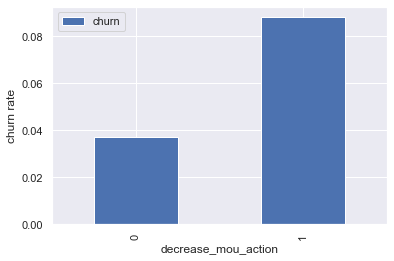

In [80]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### ✓ The churn rate is higher for consumers whose number of recharges during the action phase is lower than their number during the good phase, as is to be expected.

#### Churn rate based on whether a customer reduced their amount of recharge during the current month

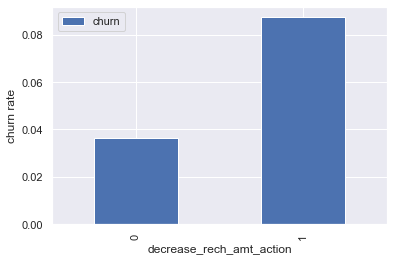

In [81]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### ✓ The same behaviour is seen here as well. Customers who recharge less frequently during the action phase than during the good phase have higher churn rates.

####  Based on whether the customer reduced their volume-based cost in action month, calculate the churn rate.

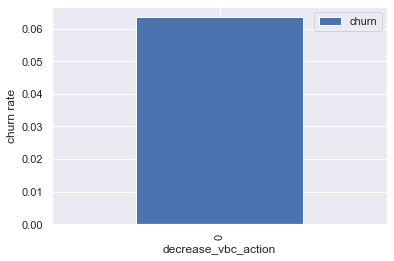

In [82]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Analysis of the average revenue per customer churn and not churn during the action phase

In [83]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

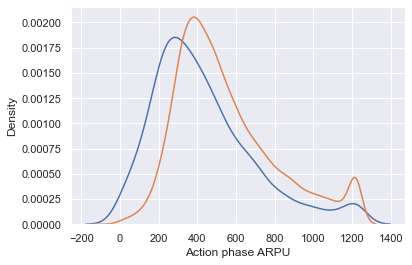

In [84]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

#### ✓ The range of average revenue per user (ARPU) for churned customers is primarily 0 to 900. Customers with higher ARPU are less likely to leave the company.

#### ✓ The range of ARPU for non-churned customers is primarily 0 to 1000.

#### Analysis of the activity phase minutes of usage MOU (churn and not churn)

[Text(0.5, 0, 'Action phase MOU')]

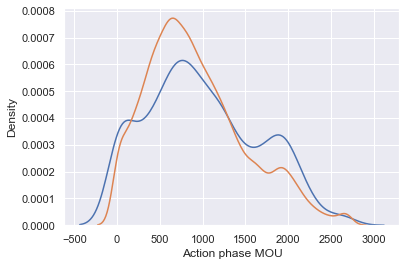

In [85]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

#### ✓ The churn customers minutes of usage (MOU) are primarily in the 0 to 2500 range. Less turnover is likely the stronger the MOU.

#### Analysis of the churn rate using the action phase's decreasing recharge amount and recharge frequency

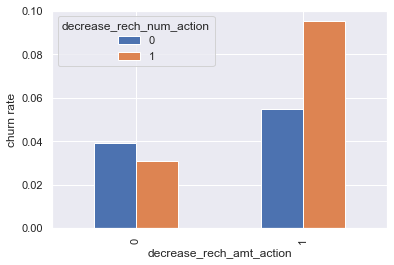

In [86]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### ✓ The accompanying graph demonstrates that consumers with lower recharge amounts and/or fewer recharges in the action phase compared to the good phase have higher churn rates.

#### Analysis of the action phase's churn rate based on volume-based costs and decreasing recharge amounts

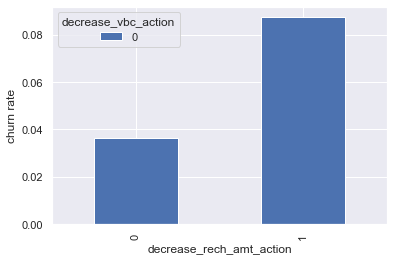

In [87]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### ✓ We can see that the churn rate is higher in this instance as well for customers whose recharge amounts are reduced while the volume-based costs rise during the action month.

##### Analysis of recharge amount and number of recharge in action month

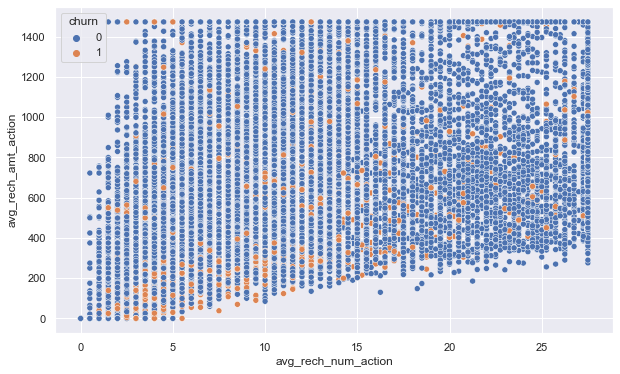

In [88]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data=data)

#### ✓  The  above graph demonstrates that the recharge quantity and amount are primarily propotional. The amount of the recharge increases with the number of recharges.

#### Removing a few derived columns that won't be used in the subsequent analysis

In [89]:
rem = ['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7']
data.drop(rem, axis=1, inplace =True)

###  Imbalance Analysis


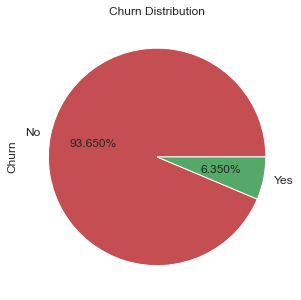

In [90]:
# Checking the customer churn distribution
ax = (data['churn'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.3f%%', 
                                                                                        labels = ['No', 'Yes'],
                                                                                        colors =['r','g'],
                                                                                        figsize =(5,5), 
                                                                                        fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

In [91]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 
            'monthly_2g_6', 'monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8',
            'sachet_3g_6','sachet_3g_7','sachet_3g_8',
            'monthly_3g_6','monthly_3g_7','monthly_3g_8'] 
num_cols = data.dtypes[(data.dtypes == "float64") | (data.dtypes == "int64") | (data.dtypes == "int32")].index.to_list()
for col in cat_cols:
    cat_cols.remove(col) 
num_cols.remove('churn')

In [92]:
print("NUMERICAL FEATURES : \n {} \n\n".format(num_cols))

NUMERICAL FEATURES : 
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6

### Numerical Data Analysis

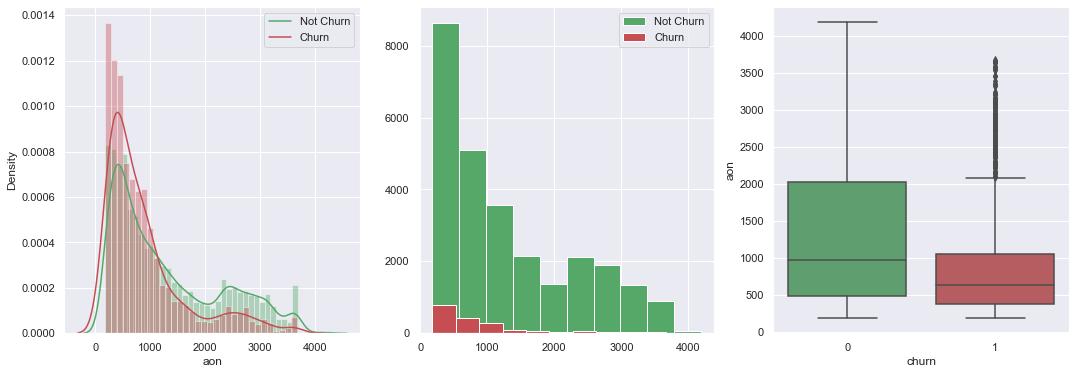

In [93]:
# Data Distribution
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.distplot(data.loc[data['churn']==0,'aon'],hist=True, color = 'g')
sns.distplot(data.loc[data['churn']==1,'aon'],hist=True, color='r')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,2)
plt.hist(data.loc[data['churn']==0,'aon'],color = 'g')
plt.hist(data.loc[data['churn']==1,'aon'],color = 'r')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,3)
sns.boxplot(y='aon', data=data, x='churn',palette =['g','r'])

plt.show()

##### This plot shows that as the user has been with the network for more period, chances of churn is less and this could be focussed as one of the parameters to retain the customers. 

##### Lets check the other numerical data distribution. This is also shown in the boxplot where 25th to 75th percentile of churn customers have lower value than non-churn customers.

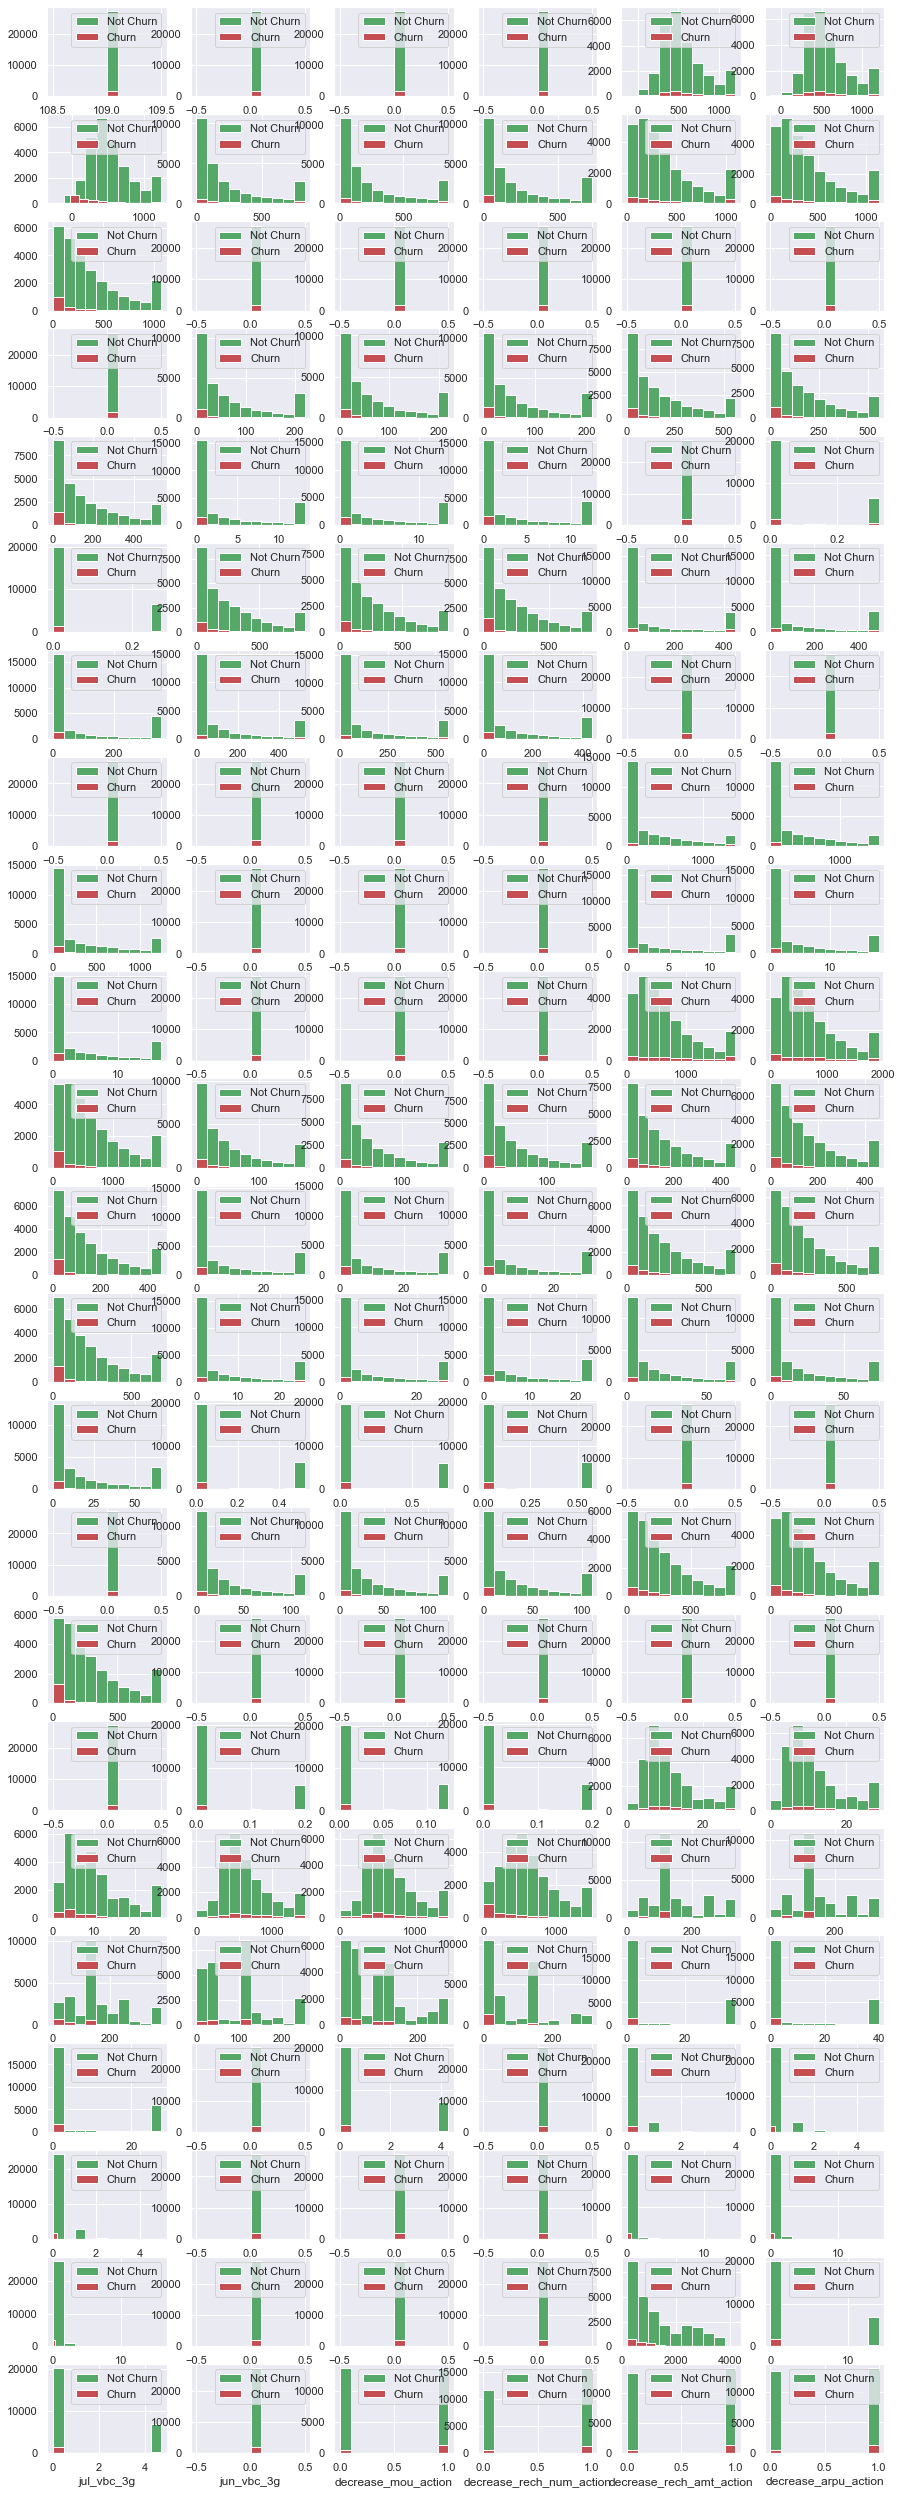

In [94]:
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(15, 45))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.hist(data.loc[data['churn']==0, num_cols[i]],color='g')
        ax.hist(data.loc[data['churn']==1, num_cols[i]],color='r')
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(num_cols[i],fontsize=12)
        ax.legend(['Not Churn','Churn'],loc = 'best')        
plt.show()


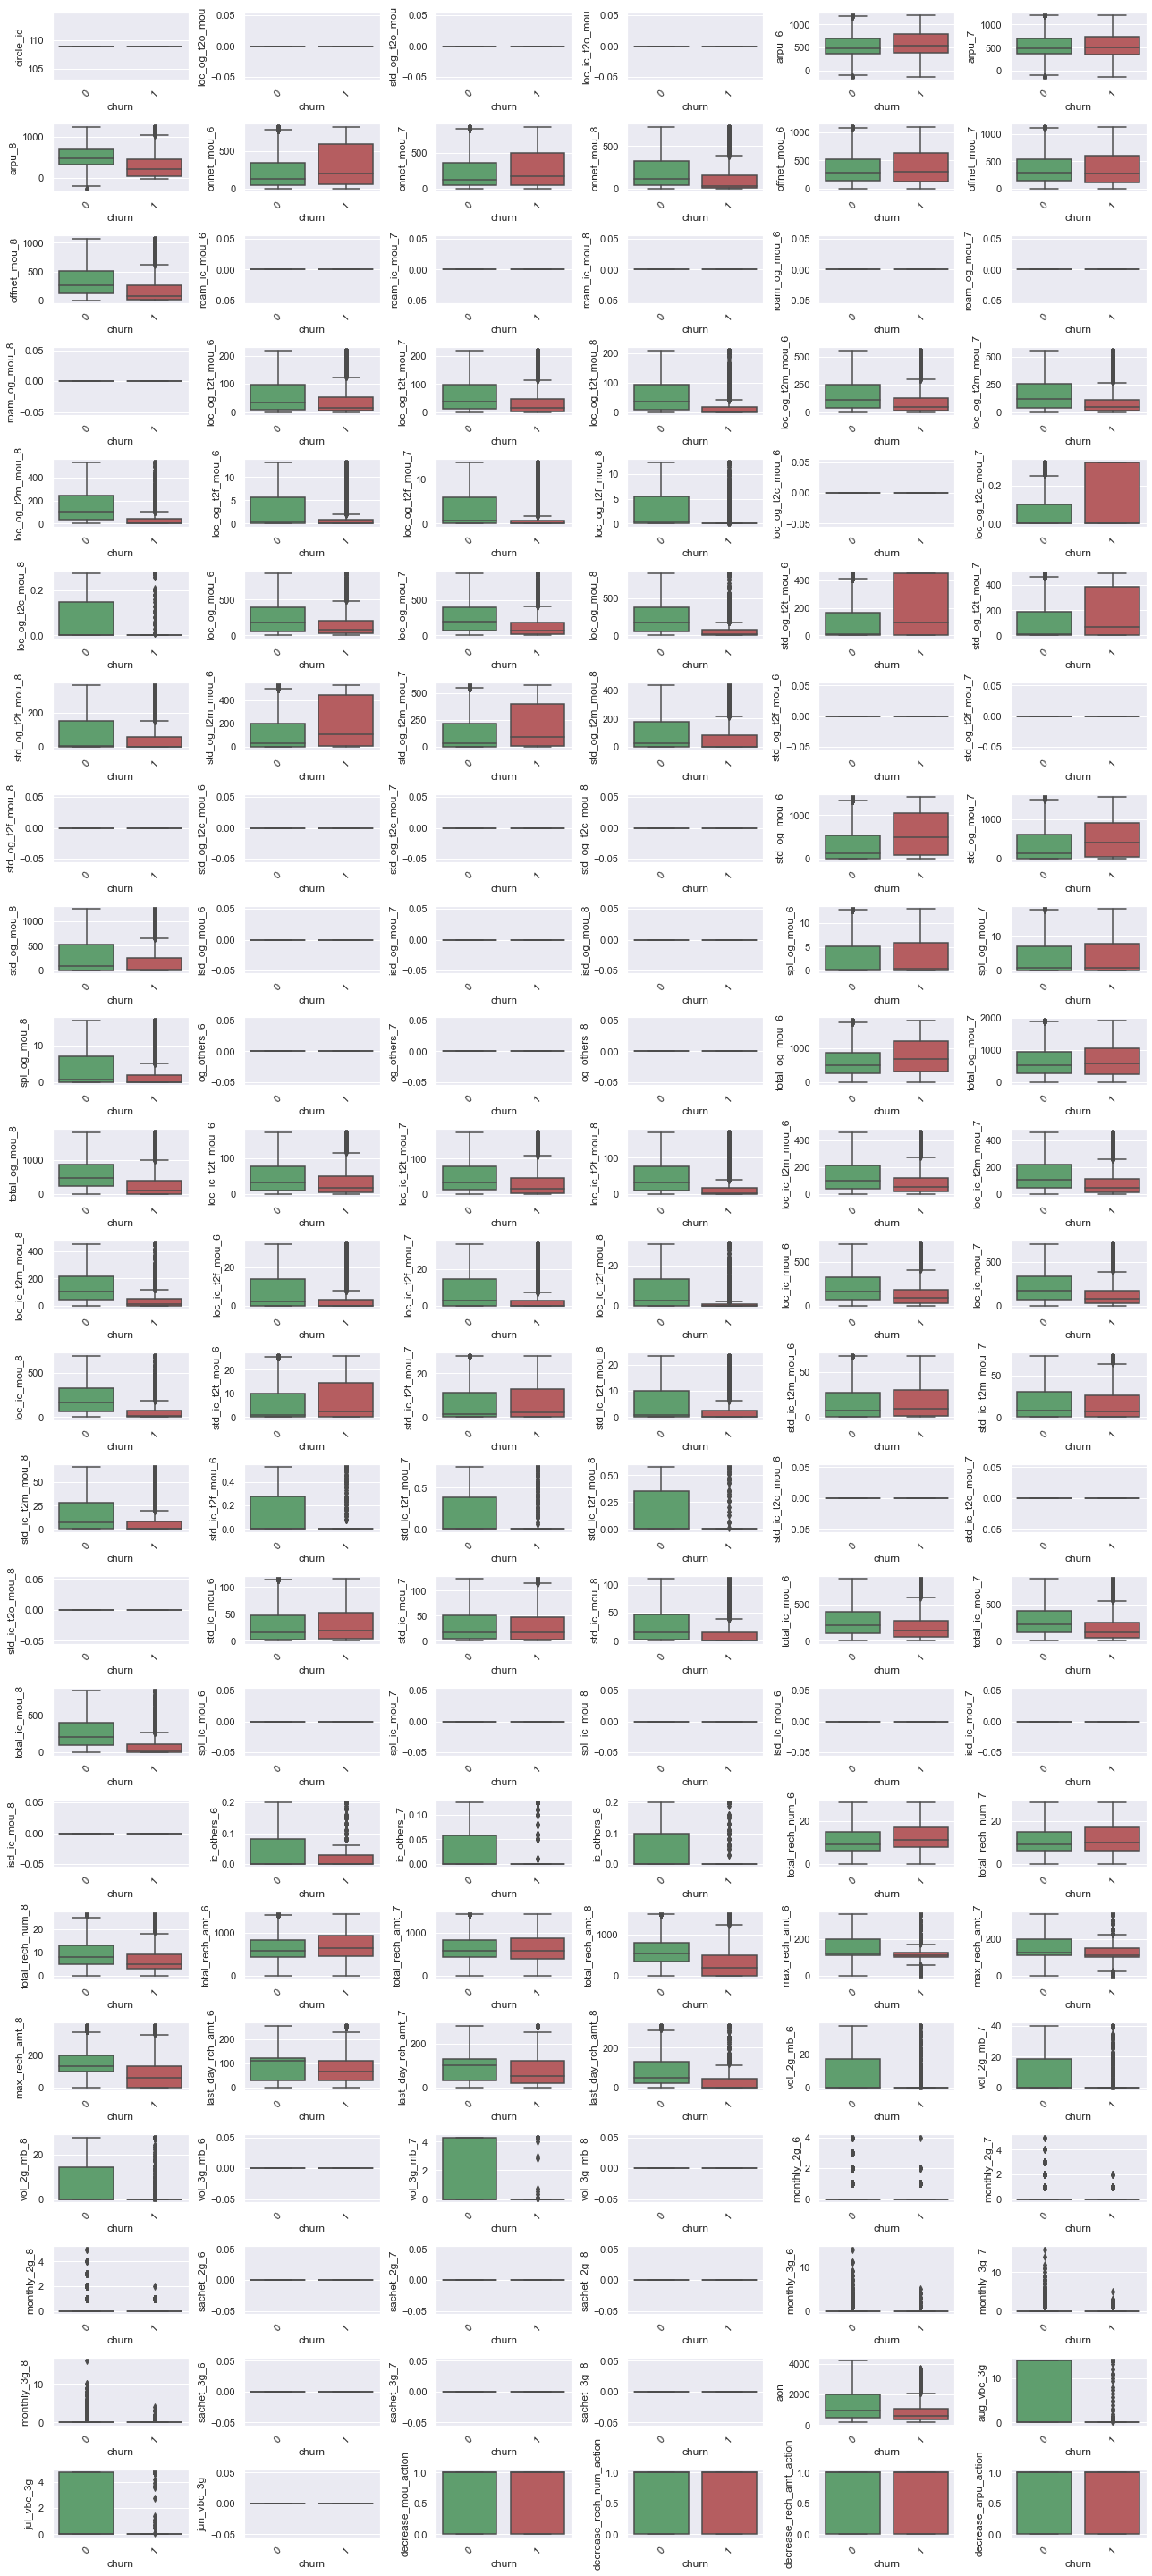

In [95]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=data, x='churn', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

## ⨳ Splitting  into train and test set



### Stratified Train Test Split

In [96]:
data[target_col].value_counts()

0    27180
1     1843
Name: churn, dtype: int64

In [97]:
class_0=data[data[target_col]==0]
       
class_1=data[data[target_col]==1]
max_len = len(class_1)
max_len

1843

In [98]:
target_col

'churn'

In [99]:
try:

    if 2*max_len<len(class_0):

        data_nouse,data_use=train_test_split(class_0, test_size=max_len,stratify=class_0)#['plantid'])

    else:

        data_use=class_0

except:

    if 2*max_len<len(class_0):

        data_nouse,data_use=train_test_split(class_0, test_size=2*max_len)

    else:

        data_use=class_0


#data_use=class_0[0:len(class_0):10]

frames = [data_use, class_1]

dataset = pd.concat(frames)


In [100]:
X = dataset.drop(labels = target_col, axis =1)
selected_features = X.columns.values 
Y = dataset[target_col]#.values
print("x.shape  : ",X.shape)
unique, frequency = np.unique(Y,return_counts=True)
print("y.unique :   : ",unique,"Frequency ::" , frequency)

x.shape  :  (5529, 139)
y.unique :   :  [0 1] Frequency :: [3686 1843]


In [101]:
try:

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,stratify=Y)
    
except:

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    

print("xtrain.shape  : ",X_train.shape)
print("ytrain.shape  : ",y_train.shape)
print("xtest.shape  : ",X_test.shape)
print("ytest.shape  : ",y_test.shape)



print("___________________________ y train value counts_________________________________")
print(y_train.value_counts())



print("___________________________ y test value counts_________________________________")
print(y_test.value_counts())

xtrain.shape  :  (3870, 139)
ytrain.shape  :  (3870,)
xtest.shape  :  (1659, 139)
ytest.shape  :  (1659,)
___________________________ y train value counts_________________________________
0    2580
1    1290
Name: churn, dtype: int64
___________________________ y test value counts_________________________________
0    1106
1     553
Name: churn, dtype: int64


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target_col, axis=1),   # just the features
    data[target_col],   # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0 ,   # for reproducibility
    stratify= data[target_col])

X_train.shape, X_test.shape

((20316, 139), (8707, 139))

In [103]:
 y_train.shape, y_test.shape

((20316,), (8707,))

In [104]:
y_train.value_counts()

0    19026
1     1290
Name: churn, dtype: int64

In [105]:
y_test.value_counts()

0    8154
1     553
Name: churn, dtype: int64

## ⨳ Removing constant features


#### ✓ The VarianceThreshold from sklearn provides a simple baseline approach to feature selection. It removes all features which variance doesn’t meet a certain threshold. 
#### ✓ By default, it removes all zero-variance features, i.e., features that have the same value in all samples

In [106]:
x_train_ind  = X_train.index
x_test_ind = X_test.index

In [107]:
sel = VarianceThreshold(threshold=0)

sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [108]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant

# (go ahead and print the result of sel.get_support() to understand its output)

sum(sel.get_support())

97

In [109]:
# now let's print the number of constant feautures
# (see how we use ~ to exclude non-constant features)

constant = X_train.columns[~sel.get_support()]

len(constant)

42

In [110]:
# let's print the constant variable names

constant

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'vol_3g_mb_6',
       'vol_3g_mb_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'jun_vbc_3g',
       'decrease_vbc_action'],
      dtype='object')

In [111]:
# let's visualise the values of the constant variables
for col in constant:
    print(col, X_train[col].unique())

circle_id [109.]
loc_og_t2o_mou [0.]
std_og_t2o_mou [0.]
loc_ic_t2o_mou [0.]
roam_ic_mou_6 [0.]
roam_ic_mou_7 [ 0. nan]
roam_ic_mou_8 [ 0. nan]
roam_og_mou_6 [0.]
roam_og_mou_7 [ 0. nan]
roam_og_mou_8 [ 0. nan]
loc_og_t2c_mou_6 [0.]
std_og_t2f_mou_6 [0.]
std_og_t2f_mou_7 [ 0. nan]
std_og_t2f_mou_8 [ 0. nan]
std_og_t2c_mou_6 [0.]
std_og_t2c_mou_7 [ 0. nan]
std_og_t2c_mou_8 [ 0. nan]
isd_og_mou_6 [0.]
isd_og_mou_7 [ 0. nan]
isd_og_mou_8 [ 0. nan]
og_others_6 [0.]
og_others_7 [ 0. nan]
og_others_8 [ 0. nan]
std_ic_t2o_mou_6 [0.]
std_ic_t2o_mou_7 [ 0. nan]
std_ic_t2o_mou_8 [ 0. nan]
spl_ic_mou_6 [0.]
spl_ic_mou_7 [ 0. nan]
spl_ic_mou_8 [ 0. nan]
isd_ic_mou_6 [0.]
isd_ic_mou_7 [ 0. nan]
isd_ic_mou_8 [ 0. nan]
vol_3g_mb_6 [0.]
vol_3g_mb_8 [0.]
sachet_2g_6 [0.]
sachet_2g_7 [0.]
sachet_2g_8 [0.]
sachet_3g_6 [0.]
sachet_3g_7 [0.]
sachet_3g_8 [0.]
jun_vbc_3g [0.]
decrease_vbc_action [0]


In [112]:
# capture non-constant feature names

feat_names = X_train.columns[sel.get_support()]

In [113]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((20316, 97), (8707, 97))

In [114]:
# X_ train is a NumPy array
X_train

array([[318.557, 325.27 , 266.877, ...,   1.   ,   1.   ,   1.   ],
       [460.831, 516.615,  58.048, ...,   1.   ,   1.   ,   1.   ],
       [661.863, 861.204, 508.15 , ...,   1.   ,   0.   ,   0.   ],
       ...,
       [426.049, 395.689, 575.535, ...,   1.   ,   0.   ,   0.   ],
       [396.911, 326.142, 472.26 , ...,   1.   ,   1.   ,   0.   ],
       [616.085, 229.127, 321.462, ...,   1.   ,   1.   ,   1.   ]])

In [115]:
# reconstitute de dataframe

X_train = pd.DataFrame(X_train, columns=feat_names,index =x_train_ind)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train = X_train.fillna(0)
X_test = pd.DataFrame(X_test, columns=feat_names)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test = X_test.fillna(0)
#X_train = pd.DataFrame(X_train, columns=feat_names,index =x_train_ind)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000195205,318.557,325.270,266.87700,63.21,79.63,71.5100,263.89,230.66,235.61,1.60,5.88,5.36,49.61,36.21,60.51,0.00,0.00,3.18,0.0,0.0,51.21,42.09,69.06,61.61,73.74,66.14,206.56,175.8100,170.8400,268.18,249.56,236.99000,11.63,18.15,3.46,332.89,312.38,309.53,3.66,6.99,7.13,91.23,86.93,102.24,0.0,0.00,2.56,94.89,93.93,111.94,8.0100,0.25,10.16,68.375,50.510,56.59,0.000,0.00,0.000,90.51,50.76,66.76,185.41,144.69,178.71,0.0,0.000,0.0,19.0,14.0,6.0,401.0,361.0,307.0,50.0,110.0,130.0,50.0,0.0,30.0,0.000,0.7600,0.0000,4.2875,0.0,0.0,0.0,0.0,0.0,0.0,934.0,0.0000,0.0000,1.0,1.0,1.0,1.0
7000211982,460.831,516.615,58.04800,62.48,4.26,0.2900,107.88,15.86,7.90,62.48,4.26,0.29,101.13,14.33,7.90,0.00,0.00,0.00,0.0,0.0,163.61,18.59,8.19,0.00,0.00,0.00,6.64,1.5300,0.0000,6.64,1.53,0.00000,0.10,0.00,0.00,170.36,20.13,8.19,35.31,50.34,96.18,97.94,71.99,15.34,3.4,0.00,0.00,136.66,122.34,111.53,0.0000,0.00,0.00,20.010,6.240,4.13,0.525,0.75,0.000,36.76,9.04,4.13,173.73,135.33,115.66,0.2,0.125,0.0,13.0,11.0,6.0,644.0,519.0,60.0,198.0,274.0,20.0,100.0,27.0,10.0,12.420,40.0125,0.0000,4.2875,1.0,1.0,0.0,0.0,0.0,0.0,875.0,14.0125,4.7125,1.0,1.0,1.0,1.0
7001499731,661.863,861.204,508.15000,280.39,393.44,144.7400,330.16,348.54,369.26,111.86,92.66,105.99,240.23,233.19,286.59,4.81,6.91,2.11,0.0,0.0,356.91,332.78,394.71,125.74,234.86,38.74,70.01,93.6400,53.2300,204.34,330.23,119.29000,0.00,0.00,0.00,561.26,663.01,514.01,45.99,45.71,106.04,269.63,190.24,123.58,3.5,4.06,0.99,319.13,240.03,230.63,25.9875,10.94,2.20,14.860,36.410,40.59,0.525,0.66,0.575,96.39,48.03,52.56,415.53,288.06,283.19,0.0,0.000,0.0,9.0,7.0,4.0,960.0,1060.0,894.0,120.0,250.0,250.0,120.0,120.0,250.0,0.000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,3044.0,0.0000,0.0000,1.0,1.0,0.0,0.0
7001771691,532.576,792.020,441.47800,75.48,348.78,159.9400,92.49,144.19,126.49,8.18,23.61,32.81,21.09,41.46,44.63,0.00,0.00,0.00,0.0,0.0,29.28,65.08,77.44,67.29,325.16,127.13,66.16,102.7300,65.5900,133.46,427.89,192.73000,6.56,8.43,16.75,171.64,501.41,295.96,42.49,39.56,46.78,33.33,44.03,41.86,0.0,0.00,0.00,75.83,83.59,88.64,25.9875,14.74,23.40,28.530,73.685,60.54,0.000,0.00,0.000,63.44,109.44,96.68,139.28,193.24,185.33,0.0,0.125,0.0,18.0,25.0,16.0,662.0,926.0,514.0,110.0,98.0,98.0,50.0,30.0,30.0,37.175,40.0125,27.6375,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1989.0,0.0000,0.0000,0.0,0.0,0.0,0.0
7000877042,172.655,1011.700,1239.90375,33.86,270.68,727.0175,167.68,924.84,1046.21,3.85

In [116]:
#use MinMaxScaler is scale the predictors (X)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#converting array into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feat_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feat_names)
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action
0,0.340817,0.342388,0.351178,0.076732,0.093138,0.098361,0.240971,0.203626,0.219884,0.007287,0.026742,0.025587,0.088838,0.064935,0.113003,0.000000,0.000000,0.255422,0.0,0.0,0.059383,0.048538,0.083333,0.137163,0.150229,0.185111,0.392847,0.309777,0.393693,0.189171,0.161376,0.190105,0.892898,1.000000,0.206567,0.181711,0.162627,0.171426,0.021060,0.039919,0.041880,0.198663,0.189876,0.224843,0.000000,0.000000,0.082982,0.134410,0.133067,0.161922,0.308225,0.008905,0.434188,1.000000,0.685486,0.857100,0.0,0.00,0.0,0.785677,0.410771,0.607683,0.217674,0.170173,0.212266,0.0,0.0,0.0,0.666667,0.491228,0.226415,0.280028,0.249827,0.204394,0.149254,0.328358,0.342556,0.196078,0.000000,0.096774,0.000000,0.018994,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.188124,0.0,0.0,1.0,1.0,1.0,1.0
1,0.447197,0.485970,0.211929,0.075845,0.004983,0.000399,0.098510,0.014001,0.007373,0.284546,0.019374,0.001384,0.181097,0.025698,0.014753,0.000000,0.000000,0.000000,0.0,0.0,0.189722,0.021438,0.009883,0.000000,0.000000,0.000000,0.012628,0.002696,0.000000,0.004684,0.000989,0.000000,0.007678,0.000000,0.000000,0.092993,0.010480,0.004536,0.203176,0.287489,0.564942,0.213275,0.157243,0.033735,0.106167,0.000000,0.000000,0.193577,0.173314,0.161328,0.000000,0.000000,0.000000,0.292651,0.084685,0.062552,1.0,1.00,0.0,0.319097,0.073155,0.037593,0.203961,0.159164,0.137377,1.0,1.0,0.0,0.456140,0.385965,0.226415,0.449721,0.359170,0.039947,0.591045,0.817910,0.052701,0.392157,0.096429,0.032258,0.334095,1.000000,0.0,1.0,0.25,0.2,0.0,0.0,0.0,0.0,0.173403,1.0,1.0,1.0,1.0,1.0,1.0
2,0.597512,0.744543,0.512061,0.340370,0.460182,0.199087,0.301485,0.307691,0.344614,0.509433,0.421416,0.505964,0.430188,0.418176,0.535211,0.364394,0.503461,0.169478,0.0,0.0,0.413873,0.383760,0.476289,0.279935,0.478476,0.108424,0.133149,0.164994,0.122666,0.144139,0.213540,0.095690,0.000000,0.000000,0.000000,0.306369,0.345167,0.284672,0.264630,0.261047,0.622858,0.587148,0.415530,0.271773,0.109290,0.120207,0.032091,0.452043,0.340041,0.333607,1.000000,0.389671,0.094017,0.217331,0.494130,0.614767,1.0,0.88,1.0,0.836719,0.388679,0.478427,0.487837,0.338793,0.336364,0.0,0.0,0.0,0.315789,0.245614,0.150943,0.670391,0.733564,0.595206,0.358209,0.746269,0.658762,0.470588,0.428571,0.806452,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.714571,0.0,0.0,1.0,1.0,0.0,0.0
3,0.500842,0.692629,0.467603,0.091626,0.407946,0.219995,0.084457,0.127291,0.118047,0.037253,0.107378,0.156625,0.037767,0.074350,0.083347,0.000000,0.000000,0.000000,0.0,0.0,0.033953,0.075050,0.093445,0.149808,0.662443,0.355807,0.125827,0.18

In [117]:

X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action
0,1.000000,1.000000,1.000000,0.024715,0.046329,0.050109,0.047931,0.105927,0.039421,0.091813,0.161726,0.173906,0.062479,0.120347,0.052253,0.068182,0.401457,0.596787,0.0,1.000000,0.064891,0.124764,0.086688,0.000000,0.008251,0.000000,0.000000,0.000000,0.000000,0.000360,0.019774,0.005399,1.000000,1.000000,0.152239,0.040017,0.083094,0.044932,0.179009,0.194343,0.239240,0.120291,0.113668,0.096126,0.872131,1.000000,0.129660,0.161890,0.174872,0.127929,0.030014,0.000000,0.0,0.059963,0.009500,0.064975,1.0,1.0,1.0,0.329514,0.911934,0.269252,0.178755,0.277729,0.140192,0.0,0.0,0.0,0.245614,0.245614,0.150943,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.00000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.363636,0.1875,0.125,0.210080,0.0,0.0,0.0,1.0,0.0,0.0
1,0.593585,0.374397,0.196227,0.216065,0.075769,0.005131,1.000000,0.433595,0.000000,0.074826,0.023468,0.000000,0.098240,0.071301,0.000000,0.000000,0.080146,0.000000,1.0,0.000000,0.082668,0.053082,0.000000,0.359682,0.115697,0.000000,1.000000,0.766222,0.000000,1.000000,0.317927,0.000000,0.566603,0.120661,0.000000,0.917803,0.281825,0.000000,0.035042,0.066875,0.000000,0.040808,0.029728,0.000000,0.015301,0.007402,0.000000,0.035894,0.036238,0.000000,0.030399,0.352627,0.0,0.332431,0.151456,0.000000,0.0,0.0,0.0,0.204253,0.170426,0.000000,0.057984,0.057312,0.000000,1.0,1.0,0.0,0.315789,0.245614,0.113208,0.600559,0.380623,0.000000,0.382090,0.328358,0.000000,0.431373,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000,0.077844,0.0,0.0,1.0,1.0,1.0,1.0
2,0.401451,0.648877,0.457189,0.016764,0.034224,0.017730,0.099524,0.111436,0.105822,0.062894,0.133074,0.061533,0.096395,0.160158,0.179898,1.000000,1.000000,0.601606,0.0,0.000000,0.123567,0.174282,0.140856,0.000000,0.000000,0.000000,0.006656,0.000000,0.000000,0.002469,0.000000,0.000000,0.000000,0.000000,0.339104,0.067037,0.115361,0.081473,0.222913,0.250653,0.182147,0.167980,0.399236,0.173756,1.000000,0.550999,0.028525,0.216977,0.347492,0.160432,0.160077,0.000000,0.0,0.034954,0.137477,0.000000,0.0,1.0,0.0,0.056944,0.088126,0.000000,0.317289,0.369961,0.254931,0.0,0.0,0.0,0.140351,0.245614,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000,0.866018,0.0,0.0,0.0,1.0,0.0,0.0
3,0.394000,0.494639,0.410011,0.123285,0.059172,0.039105,0.281259,0.402053,0.296672,0.462525,0.230083,0.135716,0.531651,0.801921,0.587202,0.060606,0.000000,0.000000,0.0,0.000000,0.462983,0.574037,0.413723,0.000000,0.000000,0.000000,0.018657,0.006502,0.007973,0.007

##### As we know Data is highly imbalanced, so we will you techniques to solve the data imbalance.

In [119]:
# Function to perform data balancing
def perform_smote(X_train, y_train):
    sm = SMOTE(random_state = 100)
    X_smote, y_smote = sm.fit_resample(X_train, y_train)
    
    X_train_smote = pd.DataFrame(X_smote, columns = feat_names)
    y_train_smote = pd.Series(y_smote)
    
    print('After SMOTE, number of values per class in training data : \n {} \n'
          .format(y_train_smote.value_counts()))
    
    return X_train_smote, y_train_smote

In [120]:
# Balancing train dataset
X_train_smote, y_train_smote = perform_smote(X_train, y_train) 

After SMOTE, number of values per class in training data : 
 0    19026
1    19026
Name: churn, dtype: int64 



By using the SMOTE technique we have balanced the data

In [121]:
# Functions to do standard scaling and performing PCA on it
def standard_scaling(X_train, X_test):
    scaler = StandardScaler()
    # Perform Fit and Transform on Training Data
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

    # Perform only Transform on Test Data
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    
    return X_train_scaled, X_test_scaled

# Perform PCA
def perform_pca(X_train, X_test, scaled = False, incremental_pca = False, n_components = 60):
    if incremental_pca:
        pca = IncrementalPCA(n_components = n_components)
    else:
        pca = PCA(svd_solver='randomized', random_state = 100)
    
    if scaled:
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
    else:
        X_train_scaled, X_test_scaled = standard_scaling(X_train, X_test)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    return pca, X_train_pca, X_test_pca

In [122]:
# Function to Summarize Model
def summarize_model(y_true, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print('False Positive Rate : {}'.format(false_positive_rate))
    print('True Positive Rate : {}'.format(true_positive_rate))
    print('Thresholds : {}'.format(thresholds))
    print('ROC AUC Score : {}'.format(roc_auc))
    print('Accuracy Score : {}'.format(accuracy_score(y_true, y_pred)))
    print('Precision Score : {}'.format(precision_score(y_true, y_pred)))
    print('Recall Score : {}'.format(recall_score(y_true, y_pred)))
    print('F1 Score : {}'.format(f1_score(y_true, y_pred)))
    print('Confusion Matrix : \n {}'.format(confusion_matrix(y_true, y_pred)))
    print('Classification Report : \n {}'.format(classification_report(y_true, y_pred)))
    
    plt.figure(figsize=(6, 6))
    plt.plot( false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


# Model Building


In [123]:
 

from sklearn.decomposition import PCA, IncrementalPCA 

#Lets initialize PCA
default_incremental_pca = IncrementalPCA()

# Logistic Regression Without PCA
   

False Positive Rate : [0.         0.00993377 1.        ]
True Positive Rate : [0.         0.14466546 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.56736584314336
Accuracy Score : 0.9363730331916849
Precision Score : 0.4968944099378882
Recall Score : 0.14466546112115733
F1 Score : 0.22408963585434175
Confusion Matrix : 
 [[8073   81]
 [ 473   80]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      8154
           1       0.50      0.14      0.22       553

    accuracy                           0.94      8707
   macro avg       0.72      0.57      0.60      8707
weighted avg       0.92      0.94      0.92      8707



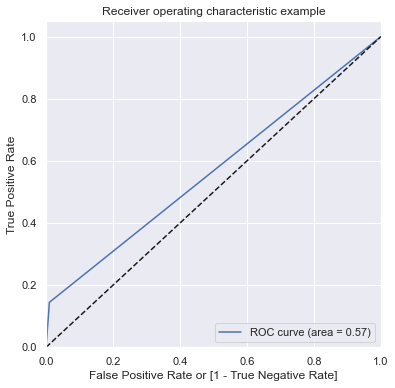

In [124]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score

log_reg_default_model = LogisticRegression()
log_reg_default_model.fit(X_train, y_train)

y_pred_log_reg_default = log_reg_default_model.predict(X_test)

summarize_model(y_test, y_pred_log_reg_default)

From the above model 'Logistic Regression without PCA' we got the following results :


Accuracy Score : 0.93


Precision Score : 0.49


Recall Score : 0.14

# Logistic Regression  With PCA
   
  

False Positive Rate : [0.         0.00932058 1.        ]
True Positive Rate : [0.         0.13381555 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.5622474863400339
Accuracy Score : 0.9362581830710922
Precision Score : 0.49333333333333335
Recall Score : 0.13381555153707053
F1 Score : 0.21052631578947367
Confusion Matrix : 
 [[8078   76]
 [ 479   74]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      8154
           1       0.49      0.13      0.21       553

    accuracy                           0.94      8707
   macro avg       0.72      0.56      0.59      8707
weighted avg       0.92      0.94      0.92      8707



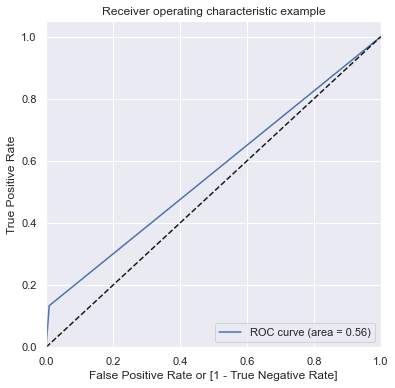

In [125]:
log_reg_default_pca, X_train_log_reg_default_pca, X_test_log_reg_default_pca = perform_pca(X_train, X_test)

log_reg_default_pca_model = LogisticRegression()
log_reg_default_pca_model.fit(X_train_log_reg_default_pca, y_train)

y_pred_log_reg_pca_default = log_reg_default_pca_model.predict(X_test_log_reg_default_pca)

summarize_model(y_test, y_pred_log_reg_pca_default)

From the above model 'Logistic Regression with PCA' we got the following results:
    
Accuracy Score : 0.93
    
    
Precision Score : 0.49
    
    
Recall Score : 0.13
    

# Logistic Regression Without PCA using SMOTE Data
  

 

False Positive Rate : [0.         0.18506255 1.        ]
True Positive Rate : [0.         0.75587703 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7854072441841744
Accuracy Score : 0.8111864017457219
Precision Score : 0.2169174883238194
Recall Score : 0.755877034358047
F1 Score : 0.3370967741935484
Confusion Matrix : 
 [[6645 1509]
 [ 135  418]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8154
           1       0.22      0.76      0.34       553

    accuracy                           0.81      8707
   macro avg       0.60      0.79      0.61      8707
weighted avg       0.93      0.81      0.85      8707



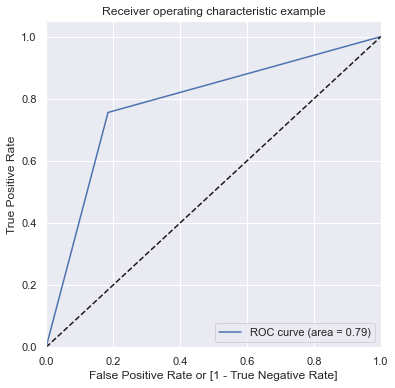

In [126]:
log_reg_smote_default_model = LogisticRegression()
log_reg_smote_default_model.fit(X_train_smote, y_train_smote)

y_pred_log_reg_smote_default = log_reg_smote_default_model.predict(X_test)

summarize_model(y_test, y_pred_log_reg_smote_default)

From the above model 'Logistic Regression without PCA using SMOTE Data' we got the following results:
    
 Accuracy Score : 0.81
        
        
Precision Score : 0.21
    
    
Recall Score : 0.75

# Logistic Regression With PCA Using  SMOTE Data
   

   

False Positive Rate : [0.        0.1861663 1.       ]
True Positive Rate : [0.         0.76130199 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.787567845200505
Accuracy Score : 0.8104973010221661
Precision Score : 0.21712222795255287
Recall Score : 0.7613019891500904
F1 Score : 0.33788121990369185
Confusion Matrix : 
 [[6636 1518]
 [ 132  421]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8154
           1       0.22      0.76      0.34       553

    accuracy                           0.81      8707
   macro avg       0.60      0.79      0.61      8707
weighted avg       0.93      0.81      0.85      8707



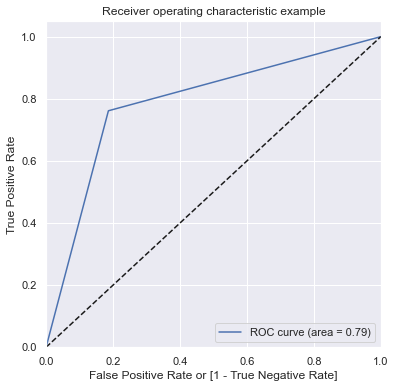

In [127]:
log_reg_smote_default_pca,\
X_train_log_reg_smote_default_pca, X_test_log_reg_smote_default_pca = perform_pca(X_train_smote, X_test)

log_reg_smote_default_pca_model = LogisticRegression()
log_reg_smote_default_pca_model.fit(X_train_log_reg_smote_default_pca, y_train_smote)

y_pred_log_reg_smote_default_pca = log_reg_smote_default_pca_model.predict(X_test_log_reg_smote_default_pca)

summarize_model(y_test, y_pred_log_reg_smote_default_pca)

From the above model 'Logistic Regression with PCA Using SMOTE data' we got the following results:

Accuracy Score : 0.81


Precision Score : 0.21


Recall Score : 0.7613019891500904

Insights:

From with and without class imbalance handling techniques, we can see smote data with PCA has better Recall and other parameters. 

So, Choosing SMOTE data with PCA for hyperparameter tuning for performance gains

# Plotting Principal Components chart

In [128]:
# Function to plot principal Components:
def pca_3D_plot(ax, X_train_pca, y_train, title):
    ax.scatter(X_train_pca[:,2], X_train_pca[:,0], X_train_pca[:,1], c=y_train.map({0:'blue',1:'orange'}))
    ax.set_title(title)
    ax.set_xlabel('Principal Component 3')
    ax.set_ylabel('Principal Component 1')
    ax.set_zlabel('Principal Component 2')

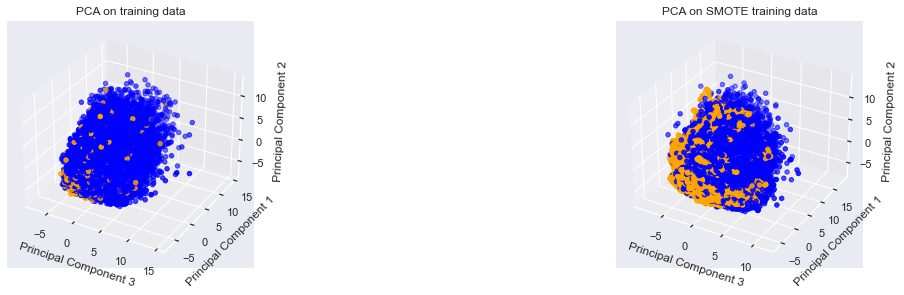

In [129]:
# Plot Principal Components 3D Diagram
fig = plt.figure(figsize=(20,10))

pca_ax1 = fig.add_subplot(2, 2, 1, projection='3d')
pca_3D_plot(pca_ax1, X_train_log_reg_default_pca, y_train,'PCA on training data')

pca_ax2 = fig.add_subplot(2, 2, 2, projection='3d')
pca_3D_plot(pca_ax2, X_train_log_reg_smote_default_pca, y_train_smote, 'PCA on SMOTE training data')

plt.show()

# Scree Plots

In [130]:
def cumulative_explained_variance_plot(subplot, title, pca):
    subplot.set_xlabel('Principal Component')
    subplot.set_ylabel('Cumulative Explained Variance')
    subplot.set_title(title)
    subplot.plot(np.cumsum(log_reg_default_pca.explained_variance_ratio_))

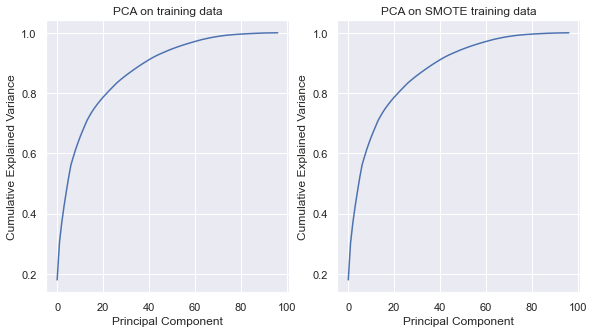

In [131]:
# Draw Scree Plot

fig = plt.figure(figsize = (20,5))

pca_subplot1 = fig.add_subplot(141)
cumulative_explained_variance_plot(pca_subplot1, 'PCA on training data', log_reg_default_pca)

pca_subplot2 = fig.add_subplot(142)
cumulative_explained_variance_plot(pca_subplot2, 'PCA on SMOTE training data', log_reg_smote_default_pca)

plt.show()

We can see that approx. 60 components explain amost more than 90% variance of the data.

# Cross-check CEV for Principal Components

In [132]:
explained_variance_df = pd.DataFrame(np.cumsum(log_reg_default_pca.explained_variance_ratio_), columns = ['default_cev'])
explained_variance_df['smote_cev'] = np.cumsum(log_reg_smote_default_pca.explained_variance_ratio_)
explained_variance_df.index = np.arange(1, len(explained_variance_df) + 1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(explained_variance_df)

,default_cev,smote_cev
1,0.179668,0.199745
2,0.303161,0.312761
3,0.369801,0.386058
4,0.424740,0.440286
5,0.473379,0.487690
6,0.519942,0.535028
7,0.561460,0.572824
8,0.587181,0.598405
9,0.611842,0.622009
10,0.633887,0.644811


# Data Preparation

In [133]:
X_train_log_reg_smote_scaled, X_test_log_reg_smote_scaled = standard_scaling(X_train_smote,X_test)

# Initialize parameters and set pipeline

In [134]:
from sklearn.pipeline import Pipeline

log_reg_pca_components = range(6, 61, 10)

log_reg_parameters = {'pca__n_components': log_reg_pca_components}

log_regression = LogisticRegression(n_jobs = -1)

log_reg_pipeline = Pipeline(steps=[('pca', default_incremental_pca),('log_regression', log_regression)])

# Hyperparameters Tuning

In [135]:
# Functions to create GRID Search
def create_grid_search(pipeline, parameters, scoring=['precision','recall', 'f1', 'roc_auc'], 
                        cv_fold_split = 5, refit = 'roc_auc'):
    folds = KFold(n_splits = cv_fold_split, shuffle = True, random_state = 100)
    
    display(parameters)

    grid_search = GridSearchCV(pipeline, cv = folds, param_grid = parameters,
                               scoring = scoring,
                               return_train_score = True, verbose = True,
                               refit = refit)
    
    return grid_search

# Function to perform GRID Search
def conduct_grid_search(grid_search, X_train, y_train, display_results = False):
    with parallel_backend('threading'):
        grid_search.fit(X_train, y_train)
        
    print('Best {} score after hyperparameters tuning : {}'.format(grid_search.refit, grid_search.best_score_))
    print('Best parameters after hyperparameters tuning for {} score : {}'\
          .format(grid_search.refit, grid_search.best_params_))

    cv_results = pd.DataFrame(grid_search.cv_results_)
    
    if display_results:
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(cv_results)
        
    return cv_results
# Create and conduct Grid Search on Logistic Regression Model
from sklearn.utils import resample, parallel_backend 

log_reg_grid_search = create_grid_search(log_reg_pipeline, log_reg_parameters)
log_reg_cv_results = conduct_grid_search(log_reg_grid_search, X_train_log_reg_smote_scaled, y_train_smote)

{'pca__n_components': range(6, 61, 10)}

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best roc_auc score after hyperparameters tuning : 0.8874742393471685
Best parameters after hyperparameters tuning for roc_auc score : {'pca__n_components': 56}


In [136]:
# Create and conduct Grid Search on Logistic Regression Model
from sklearn.utils import resample, parallel_backend 

log_reg_grid_search = create_grid_search(log_reg_pipeline, log_reg_parameters)
log_reg_cv_results = conduct_grid_search(log_reg_grid_search, X_train_log_reg_smote_scaled, y_train_smote)

{'pca__n_components': range(6, 61, 10)}

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best roc_auc score after hyperparameters tuning : 0.8874742393471685
Best parameters after hyperparameters tuning for roc_auc score : {'pca__n_components': 56}


# Validating Hyperparameter tuning results

In [137]:
# Function to plot parameters
def plot_hyperparameters_subplot(dataframe, param, ax, xlabel, title = ''):
    if title:
        ax.set_title(title)
    else:
        ax.set_title('{} - AUC Score: Test vs Train'.format(xlabel))
        
    ax.plot(dataframe[param], 
         dataframe.mean_test_roc_auc, color='g')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Mean Test AUC Score', color='g')

    ax2 = ax.twinx()
    ax2.plot(dataframe[param], 
             dataframe.mean_test_recall, color='r')
    ax2.set_ylabel('Mean Test Recall Score', color='r')

def plot_hyperparameters(dataframe, param, xlabel):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(111)
    plot_hyperparameters_subplot(dataframe, param, ax1, xlabel)
    plt.show()

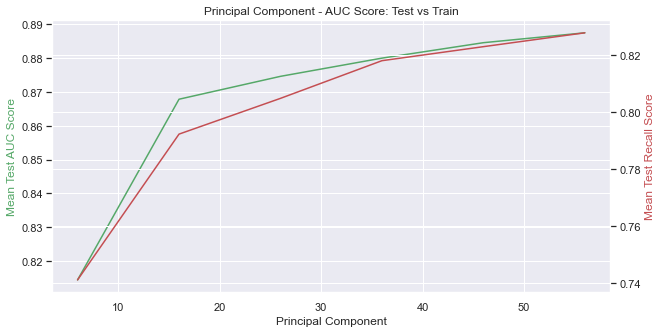

In [138]:
plot_hyperparameters(log_reg_cv_results, 'param_pca__n_components', 'Principal Component')

# Final Logistic Regression Model

False Positive Rate : [0.         0.19597743 1.        ]
True Positive Rate : [0.         0.76672694 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7853747547770518
Accuracy Score : 0.8016538417365339
Precision Score : 0.20969337289812068
Recall Score : 0.7667269439421338
F1 Score : 0.32932038834951455
Confusion Matrix : 
 [[6556 1598]
 [ 129  424]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8154
           1       0.21      0.77      0.33       553

    accuracy                           0.80      8707
   macro avg       0.60      0.79      0.61      8707
weighted avg       0.93      0.80      0.85      8707



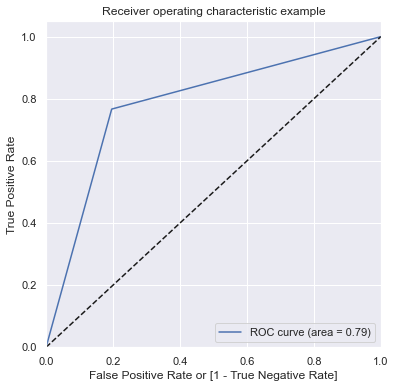

In [139]:
log_reg_pca, X_train_log_reg_pca, X_test_log_reg_pca = perform_pca(X_train_smote, X_test, 
                                                                   incremental_pca = True, n_components = 56)

final_log_reg = LogisticRegression()
final_log_reg.fit(X_train_log_reg_pca, y_train_smote)

y_pred_log_reg = final_log_reg.predict(X_test_log_reg_pca)
summarize_model(y_test, y_pred_log_reg)

ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

# Decision Tree Classifier Without PCA


False Positive Rate : [0.         0.05285749 1.        ]
True Positive Rate : [0.         0.32007233 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6336074197378582
Accuracy Score : 0.9073159526817504
Precision Score : 0.2911184210526316
Recall Score : 0.32007233273056057
F1 Score : 0.30490956072351416
Confusion Matrix : 
 [[7723  431]
 [ 376  177]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      8154
           1       0.29      0.32      0.30       553

    accuracy                           0.91      8707
   macro avg       0.62      0.63      0.63      8707
weighted avg       0.91      0.91      0.91      8707



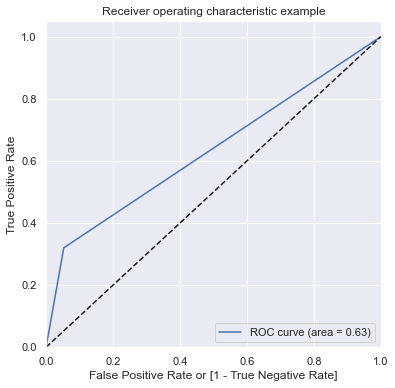

In [140]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

default_decision_tree = DecisionTreeClassifier(random_state = 100)

default_decision_tree.fit(X_train, y_train)

y_pred_decision_tree_default = default_decision_tree.predict(X_test)

summarize_model(y_test, y_pred_decision_tree_default)

# Decision Tree Classifier With PCA


False Positive Rate : [0.         0.05813098 1.        ]
True Positive Rate : [0.         0.24050633 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.591187675226572
Accuracy Score : 0.8973239921901918
Precision Score : 0.21911037891268534
Recall Score : 0.24050632911392406
F1 Score : 0.22931034482758622
Confusion Matrix : 
 [[7680  474]
 [ 420  133]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      8154
           1       0.22      0.24      0.23       553

    accuracy                           0.90      8707
   macro avg       0.58      0.59      0.59      8707
weighted avg       0.90      0.90      0.90      8707



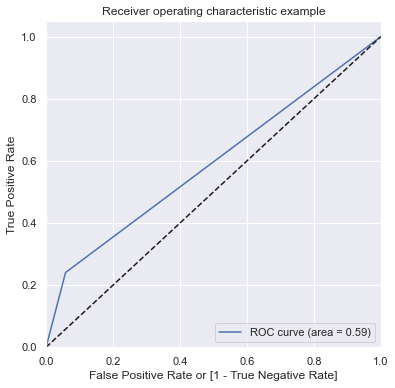

In [141]:
decision_tree_default_pca,\
X_train_decision_tree_default_pca, X_test_decision_tree_default_pca = perform_pca(X_train, X_test)

default_decision_tree_pca_model = DecisionTreeClassifier(random_state = 100)

default_decision_tree_pca_model.fit(X_train_decision_tree_default_pca, y_train)

y_pred_decision_tree_default_pca = default_decision_tree_pca_model.predict(X_test_decision_tree_default_pca)

summarize_model(y_test, y_pred_decision_tree_default_pca)

# Decision Tree With SMOTE Data


False Positive Rate : [0.         0.09222468 1.        ]
True Positive Rate : [0.         0.35262206 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6301986932383445
Accuracy Score : 0.8725163661421844
Precision Score : 0.20591341077085534
Recall Score : 0.352622061482821
F1 Score : 0.26
Confusion Matrix : 
 [[7402  752]
 [ 358  195]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      8154
           1       0.21      0.35      0.26       553

    accuracy                           0.87      8707
   macro avg       0.58      0.63      0.60      8707
weighted avg       0.91      0.87      0.89      8707



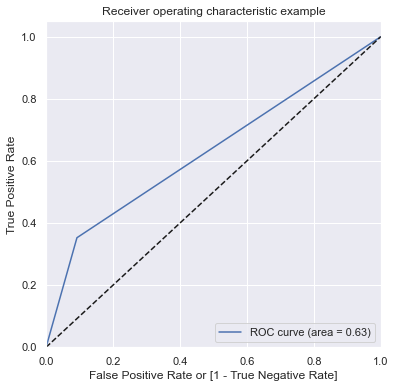

In [142]:
decision_tree_smote_default_model = DecisionTreeClassifier(random_state = 100)

decision_tree_smote_default_model.fit(X_train_smote, y_train_smote)

y_pred_decision_tree_smote_default = decision_tree_smote_default_model.predict(X_test)

summarize_model(y_test, y_pred_decision_tree_smote_default)

# Decision Tree Classifier With PCA using SMOTE Data


False Positive Rate : [0.         0.14189355 1.        ]
True Positive Rate : [0.         0.40144665 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6297765527164472
Accuracy Score : 0.8291030205581715
Precision Score : 0.16098622189992748
Recall Score : 0.4014466546112116
F1 Score : 0.2298136645962733
Confusion Matrix : 
 [[6997 1157]
 [ 331  222]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      8154
           1       0.16      0.40      0.23       553

    accuracy                           0.83      8707
   macro avg       0.56      0.63      0.57      8707
weighted avg       0.90      0.83      0.86      8707



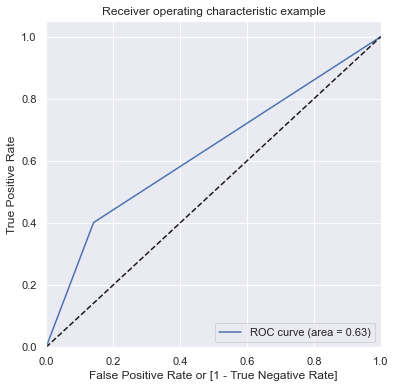

In [143]:
decision_tree_smote_default_pca,\
X_train_decision_tree_smote_default_pca,\
X_test_decision_tree_smote_default_pca = perform_pca(X_train_smote, X_test)

decision_tree_smote_default_pca_model = DecisionTreeClassifier(random_state = 100)

decision_tree_smote_default_pca_model.fit(X_train_decision_tree_smote_default_pca, y_train_smote)

y_pred_decision_tree_smote_default_pca = decision_tree_smote_default_pca_model.predict(X_test_decision_tree_smote_default_pca)

summarize_model(y_test, y_pred_decision_tree_smote_default_pca)

Insights:

Training Data with Smote class imbalance technique without PCA seems to be providing best overall performance for churn class prediction. 

Hence, using the same for hyperparameters tuning

# Initialize parameters and set pipeline

In [144]:
decision_tree_max_depth = range(1, 6, 1)
decision_tree_min_samples_leaf = range(1, 151, 50)

decision_tree_parameters = {'decision_tree__min_samples_leaf': decision_tree_min_samples_leaf,
                            'decision_tree__max_depth': decision_tree_max_depth}

decision_tree = DecisionTreeClassifier(random_state = 100)

decision_tree_pipeline = Pipeline(steps=[('decision_tree', decision_tree)])

# Hyperparameters Tuning

In [145]:
# Create and Conduct Grid Search
decision_tree_grid_search = create_grid_search(decision_tree_pipeline, decision_tree_parameters)
decision_tree_cv_results = conduct_grid_search(decision_tree_grid_search, X_train_smote, y_train_smote)

{'decision_tree__min_samples_leaf': range(1, 151, 50),
 'decision_tree__max_depth': range(1, 6)}

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best roc_auc score after hyperparameters tuning : 0.8921508406319182
Best parameters after hyperparameters tuning for roc_auc score : {'decision_tree__max_depth': 5, 'decision_tree__min_samples_leaf': 1}


# Validating Hyperparameters Tuning results

In [146]:
# Function to plot hyperparameters tuning results
def plot_params(dataframe, param, sub_param, param_name, sub_param_name):
    subplots_values = dataframe[param].unique()
    total_subplot_values = len(subplots_values)
    subplot_rows = math.ceil(total_subplot_values /2)
    fig = plt.figure(figsize = (25, subplot_rows * 6))
    for index, param_value in enumerate(subplots_values):
        param_ax1 = fig.add_subplot(subplot_rows, 2, (index + 1))
        plot_hyperparameters_subplot(dataframe[dataframe[param] == param_value], sub_param, 
                   param_ax1, sub_param_name, '{} = {}'.format(param_name, param_value))
    plt.show()

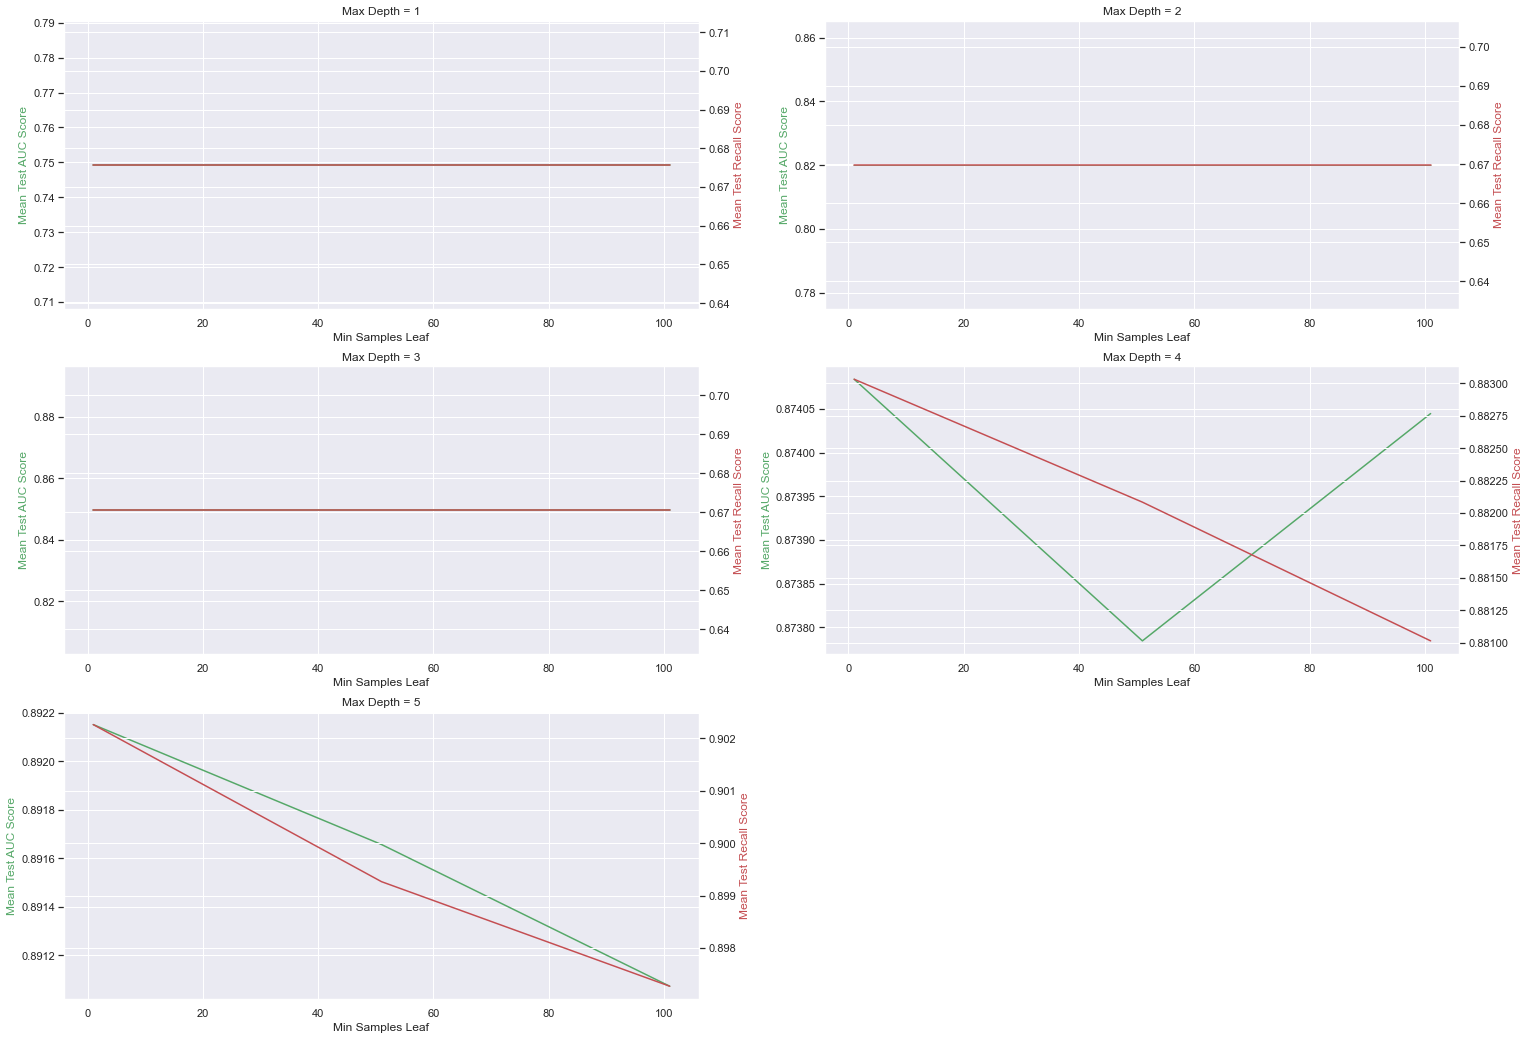

In [147]:
import math
plot_params(decision_tree_cv_results, 'param_decision_tree__max_depth',
                    'param_decision_tree__min_samples_leaf','Max Depth','Min Samples Leaf')

# Final Decision Tree Classifier Model

False Positive Rate : [0.         0.28268335 1.        ]
True Positive Rate : [0.         0.71428571 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7158011843442308
Accuracy Score : 0.7171241529803606
Precision Score : 0.14629629629629629
Recall Score : 0.7142857142857143
F1 Score : 0.24285275130648631
Confusion Matrix : 
 [[5849 2305]
 [ 158  395]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.72      0.83      8154
           1       0.15      0.71      0.24       553

    accuracy                           0.72      8707
   macro avg       0.56      0.72      0.53      8707
weighted avg       0.92      0.72      0.79      8707



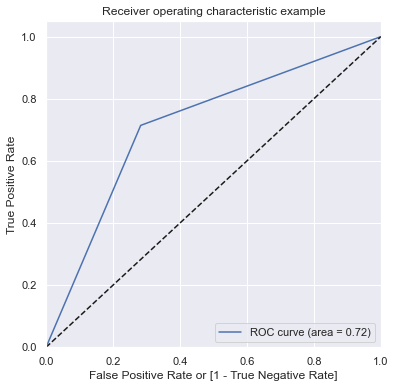

In [148]:
final_decision_tree = DecisionTreeClassifier(random_state = 100, min_samples_leaf = 50, max_depth = 5)
final_decision_tree.fit(X_train_smote, y_train_smote)

y_pred_decision_tree = final_decision_tree.predict(X_test)
summarize_model(y_test, y_pred_decision_tree)

# Random Forest Classifier

Since Random Forest is an ensemble of Decision Trees. Therefore, using smote imbalance technique without PCA data set to train model.

# Default Random Forest Classifier Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


False Positive Rate : [0.         0.02563159 1.        ]
True Positive Rate : [0.         0.38517179 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.679770099189162
Accuracy Score : 0.936947283794648
Precision Score : 0.504739336492891
Recall Score : 0.38517179023508136
F1 Score : 0.43692307692307686
Confusion Matrix : 
 [[7945  209]
 [ 340  213]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      8154
           1       0.50      0.39      0.44       553

    accuracy                           0.94      8707
   macro avg       0.73      0.68      0.70      8707
weighted avg       0.93      0.94      0.93      8707



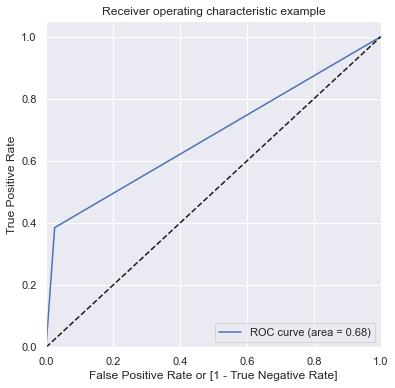

Out of Bag Error : 0.9720119836013876


In [149]:
random_forest_default_model = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1)
random_forest_default_model.fit(X_train_smote, y_train_smote)

y_pred_random_forest_default = random_forest_default_model.predict(X_test)
summarize_model(y_test, y_pred_random_forest_default)
print('Out of Bag Error : {}'.format(random_forest_default_model.oob_score_))

# Initialize parameters and set pipeline

In [150]:
random_forest_max_features = range(5, 61, 5)
random_forest_n_estimators = range(50, 251, 50)

random_forest_parameters = {'random_forest__max_features': random_forest_max_features, 
                           'random_forest__n_estimators': random_forest_n_estimators}

random_forest = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, n_jobs= -1)

random_forest_pipeline = Pipeline(steps=[('random_forest', random_forest)])

# Hyperparameters Tuning

In [151]:
random_forest_grid_search = create_grid_search(random_forest_pipeline, random_forest_parameters, cv_fold_split = 2)
random_forest_cv_results = conduct_grid_search(random_forest_grid_search, X_train_smote, y_train_smote)

{'random_forest__max_features': range(5, 61, 5),
 'random_forest__n_estimators': range(50, 251, 50)}

Fitting 2 folds for each of 60 candidates, totalling 120 fits
Best roc_auc score after hyperparameters tuning : 0.9933502872541005
Best parameters after hyperparameters tuning for roc_auc score : {'random_forest__max_features': 10, 'random_forest__n_estimators': 250}


# Validate Hyperparameters tuning results

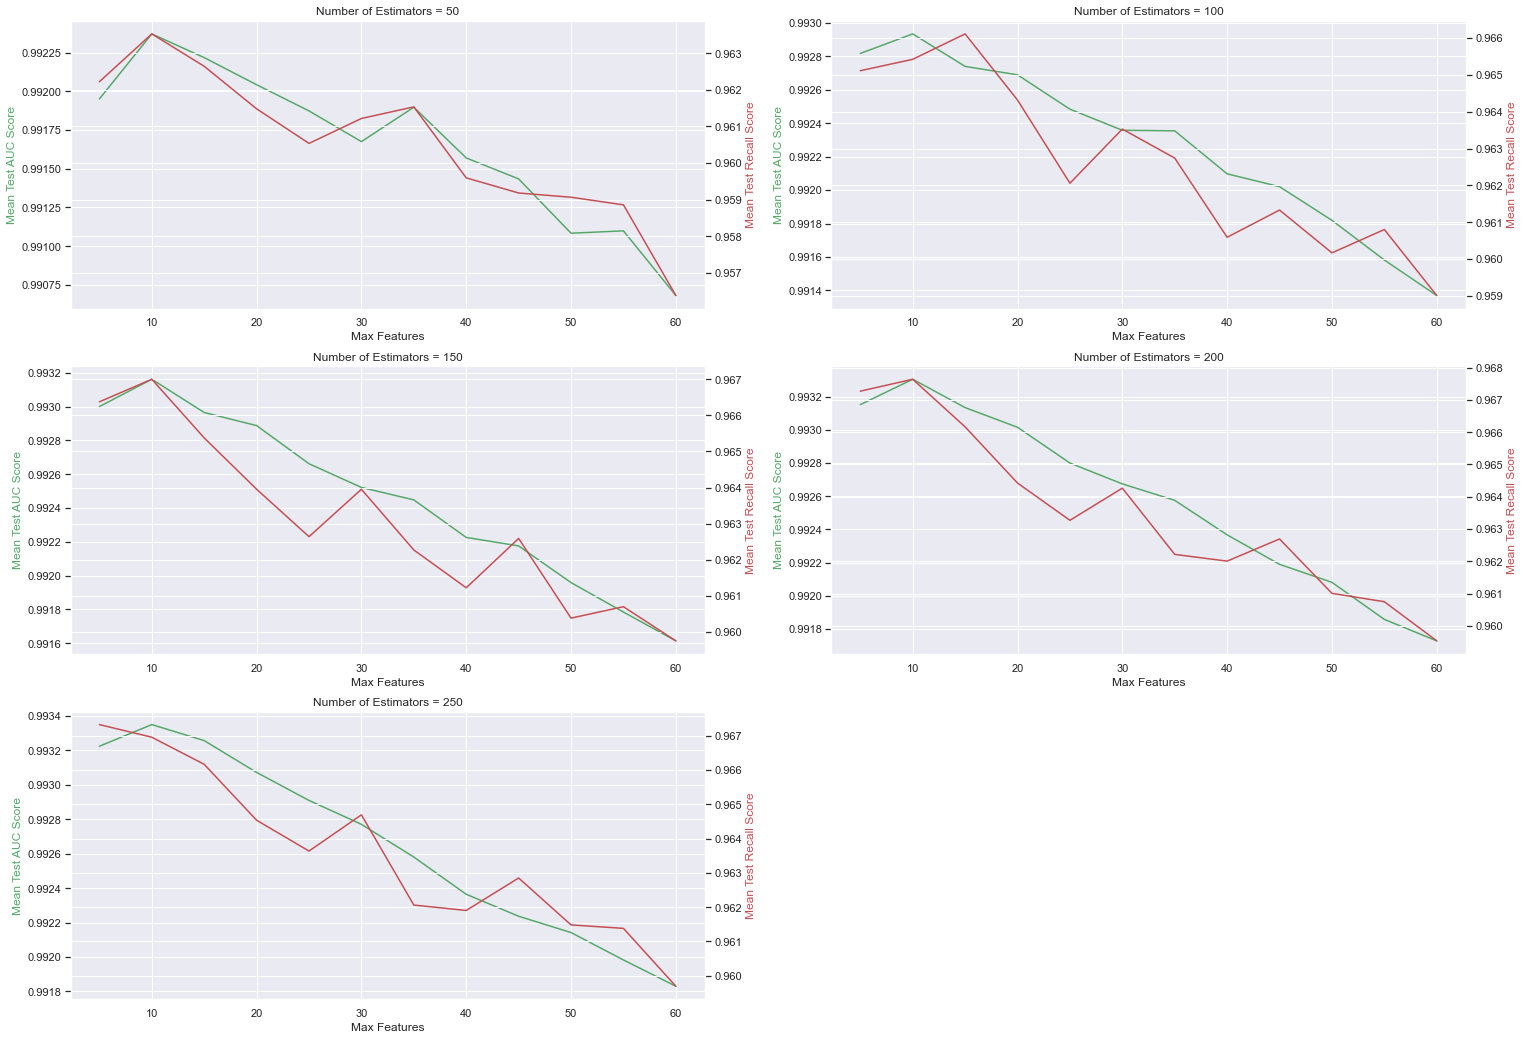

In [152]:
plot_params(random_forest_cv_results, 'param_random_forest__n_estimators', 'param_random_forest__max_features', 
            'Number of Estimators', 'Max Features')

# Final Random Forest Classifier Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    0.4s finished


False Positive Rate : [0.         0.02649007 1.        ]
True Positive Rate : [0.         0.36889693 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6712034298168928
Accuracy Score : 0.935109681865166
Precision Score : 0.4857142857142857
Recall Score : 0.3688969258589512
F1 Score : 0.41932168550873583
Confusion Matrix : 
 [[7938  216]
 [ 349  204]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      8154
           1       0.49      0.37      0.42       553

    accuracy                           0.94      8707
   macro avg       0.72      0.67      0.69      8707
weighted avg       0.93      0.94      0.93      8707



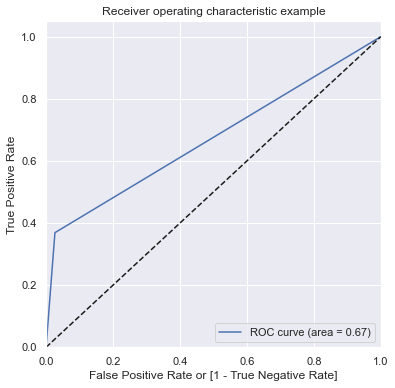

In [153]:
random_forest_final_model = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1, max_features = 15, n_estimators = 250)
random_forest_final_model.fit(X_train_smote, y_train_smote)

y_pred_random_forest_final = random_forest_final_model.predict(X_test)
summarize_model(y_test, y_pred_random_forest_final)

# Identifying important churn indicators and business recommendation

All above mentioned algorithm implementations have also been tested with default data and SMOTE class imbalance technique. The same has also been tested with/without PCA to cross-check the performance with chosen class imbalance technique and PCA option.

All above mentioned algorithm implementations have also been hypertuned and tested with other parameters.

For each implemented algorithm, only the class imbalance technique with PCA option and hyperparameter tuning providing the best result have been retained above.

Following class imbalance and PCA option have been used for above mentioned algorithm implementation:

SMOTE sampled train data set without PCA for decision trees based algorithms.

Default train data set without PCA for balanced decision trees based algorithms.

SMOTE sampled train data set with PCA for logistic regression and SVM algorithms.

Random Forest and Decision Tree are very good algorithms in terms of classification problems but Out of all implemented algorithms,We can see that the logistic model without PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also helps us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business

# Model Features Selection
Importance Features Selection Model

In [154]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(final_decision_tree)
sel.fit(X_train_smote, y_train_smote)

important_features_results = pd.DataFrame(list(zip(X_train.columns, sel.get_support(), 
                                            final_decision_tree.feature_importances_)))
important_features_results.columns = ('column_name', 'support', 'importance')
important_features_results = important_features_results[important_features_results['support'] == True]
important_features_results.reset_index(inplace = True, drop = True)
important_features_results.drop('support', axis = 1, inplace = True)
important_features_results = important_features_results.sort_values(by='importance', ascending = False)
kpi_results = important_features_results['column_name']
display(important_features_results)

,column_name,importance
2,total_ic_mou_8,0.516120
7,vol_2g_mb_8,0.098450
6,last_day_rch_amt_8,0.098145
5,total_rech_amt_8,0.073198
0,spl_og_mou_7,0.070569
4,ic_others_8,0.048406
8,aug_vbc_3g,0.023458
1,total_og_mou_8,0.023303
3,ic_others_6,0.017819


# Analyse the columns KPIs

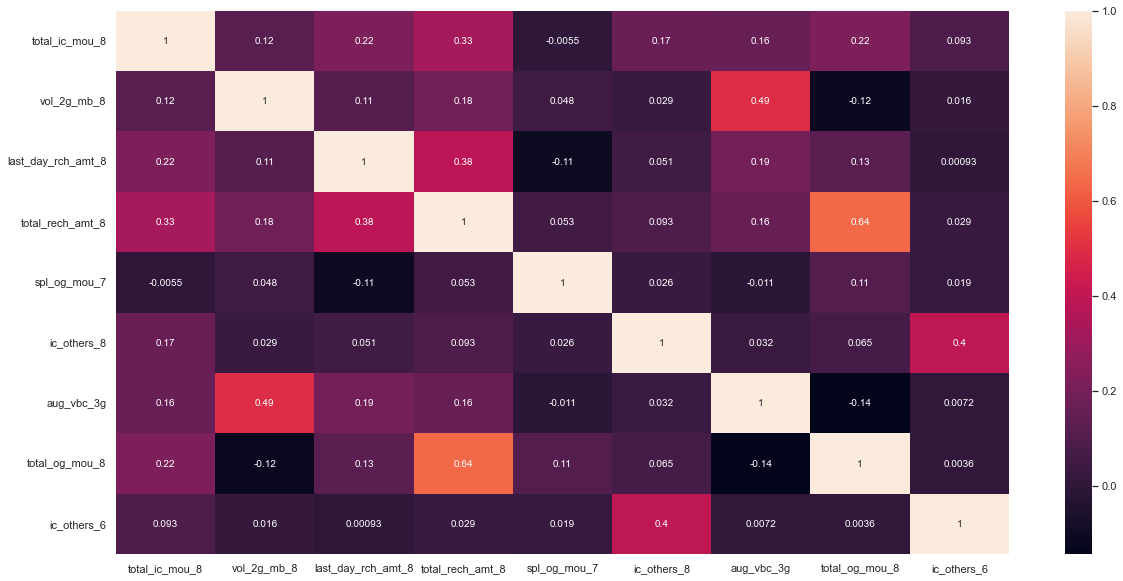

In [155]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train[kpi_results].corr(), annot = True)
plt.show()

# Analyse Highly correlated KPIs

In [156]:
# Create correlation matrix
kpi_corr_matrix = X_train[kpi_results].corr().abs()

# Select upper triangle of correlation matrix
kpi_upper = kpi_corr_matrix.where(np.triu(np.ones(kpi_corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.5
kpi_corr_columns = [column for column in kpi_upper.columns if any(kpi_upper[column] >= 0.5)]

print('KPI corelated columns : \n {}'.format(kpi_corr_columns))

important_feature_results_without_corr = important_features_results[~important_features_results['column_name']
                                                       .isin(kpi_corr_columns)].copy()

important_features_results_without_corr = important_feature_results_without_corr['column_name']
display(important_feature_results_without_corr)

KPI corelated columns : 
 ['total_og_mou_8']


,column_name,importance
2,total_ic_mou_8,0.516120
7,vol_2g_mb_8,0.098450
6,last_day_rch_amt_8,0.098145
5,total_rech_amt_8,0.073198
0,spl_og_mou_7,0.070569
4,ic_others_8,0.048406
8,aug_vbc_3g,0.023458
3,ic_others_6,0.017819


# Validate the final selected features

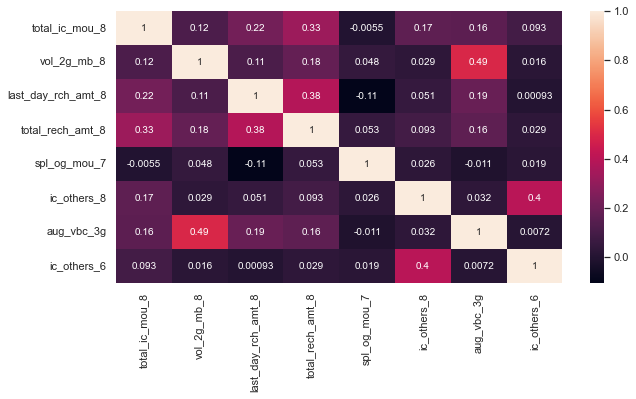

In [157]:
plt.figure(figsize = (10, 5))
sns.heatmap(X_train[important_features_results_without_corr].corr(), annot = True)
plt.show()

# Plot All vs Uncorrelated Importance Features

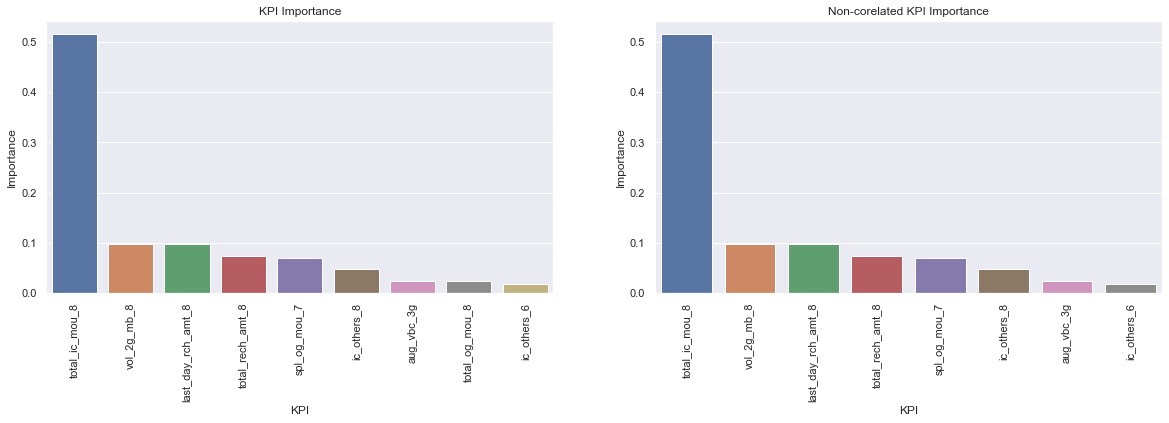

In [158]:
plt.figure(figsize=(20, 5))

plt.subplot(121)

feature_plot = sns.barplot(x='column_name', y= 'importance', data=important_features_results, 
                           order = important_features_results['column_name'])
feature_plot.set(xlabel = 'KPI', ylabel = 'Importance', title='KPI Importance')

for label in feature_plot.get_xticklabels():
    label.set_rotation(90)

plt.subplot(122)

feature_plot = sns.barplot(x='column_name', y= 'importance', data=important_feature_results_without_corr, 
                           order = important_feature_results_without_corr['column_name'])
feature_plot.set(xlabel = 'KPI', ylabel = 'Importance', title='Non-corelated KPI Importance')

for label in feature_plot.get_xticklabels():
    label.set_rotation(90)
    
plt.show()

# Plotting selected Features distribution for Churn vs Non-churn

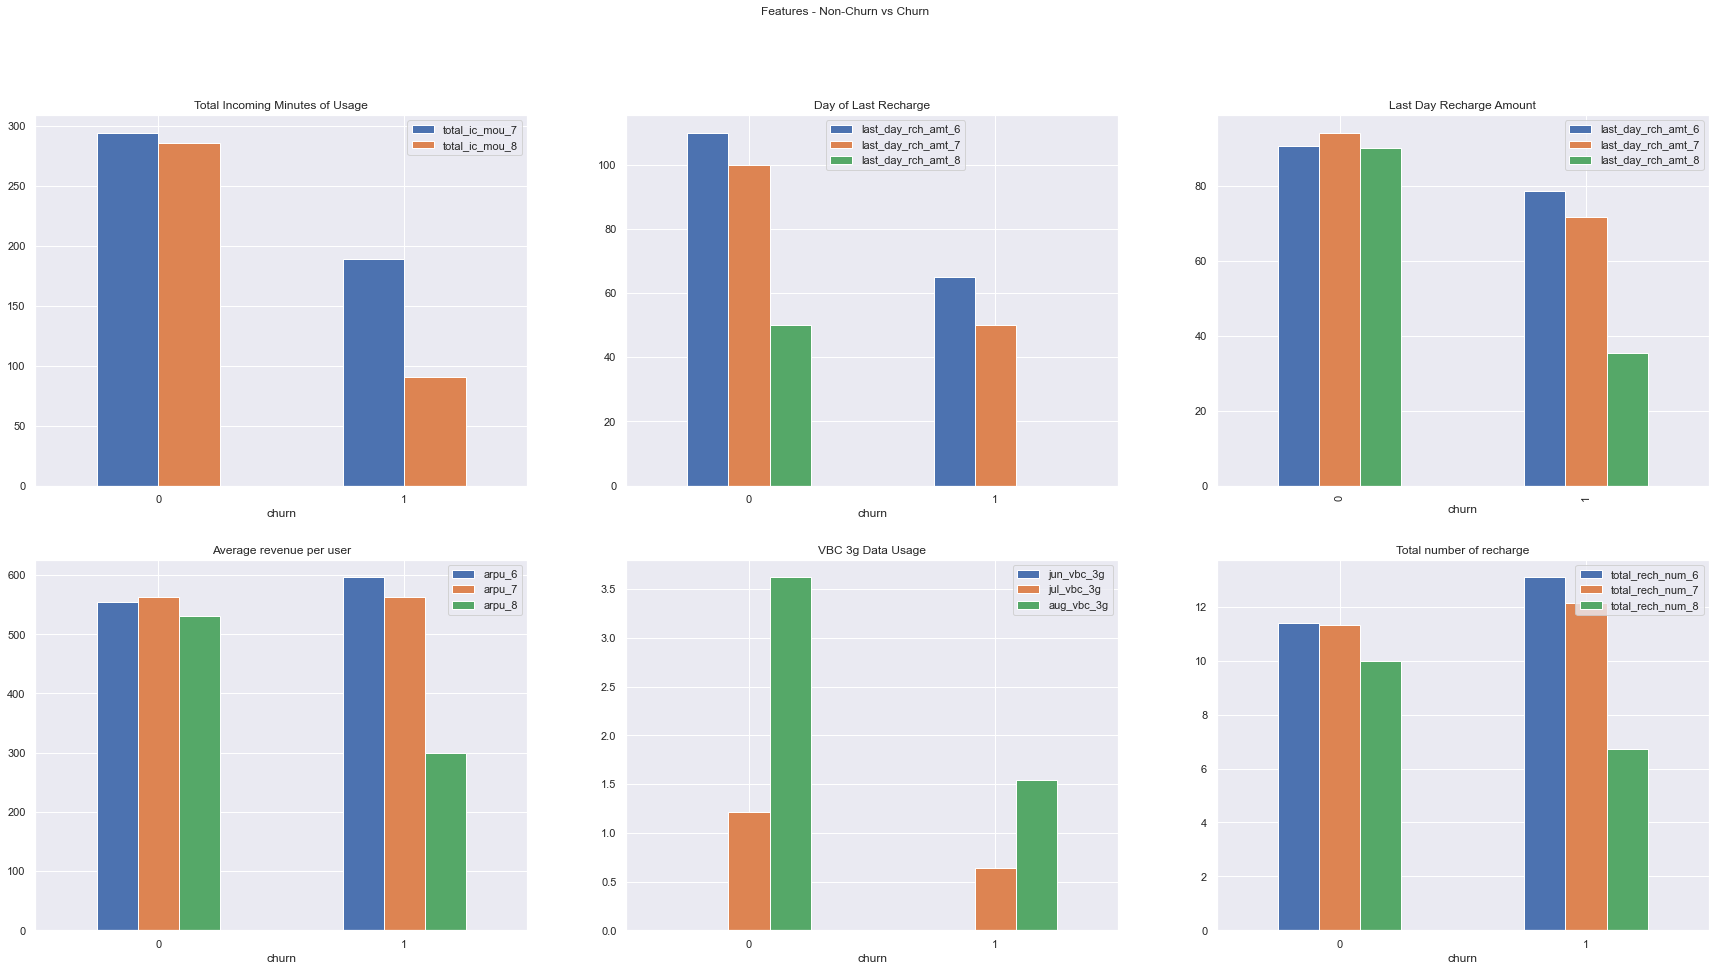

In [172]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (30,15))

plt.suptitle('Features - Non-Churn vs Churn')

total_ic_mou_df = master_df.groupby(['churn'])['total_ic_mou_7', 'total_ic_mou_8'].mean()
total_ic_mou_ax = total_ic_mou_df.plot.bar(ax=axes[0,0], title = 'Total Incoming Minutes of Usage', rot = 0)
total_ic_mou_ax.legend(loc='upper right')

day_of_last_rech_df = master_df.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
day_of_last_rech_ax = day_of_last_rech_df.plot.bar(ax=axes[0, 1], title = 'Day of Last Recharge', rot = 0)
day_of_last_rech_ax.legend(bbox_to_anchor=(0.7, 1))

last_day_rch_amt_df = master_df.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].mean()
last_day_rch_amt_ax = last_day_rch_amt_df.plot.bar(ax=axes[0, 2], title = 'Last Day Recharge Amount')
last_day_rch_amt_ax.legend(loc='upper right')

arpu_df = master_df.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].mean()
arpu_df_ax = arpu_df.plot.bar(ax=axes[1, 0], title = 'Average revenue per user', rot = 0)
arpu_df_ax.legend(loc='upper right')

vbc_3g_df = master_df.groupby(['churn'])['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g'].mean()
vbc_3g_df_ax = vbc_3g_df.plot.bar(ax=axes[1, 1], title = 'VBC 3g Data Usage', rot = 0)
vbc_3g_df_ax.legend(loc='upper right')

total_rech_num_df = master_df.groupby(['churn'])['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'].mean()
total_rech_num_df_ax = total_rech_num_df.plot.bar(ax=axes[1, 2], title = 'Total number of recharge', rot = 0)
total_rech_num_df_ax.legend(loc='upper right')


plt.show()

# Business Recommendations

Churn customers have clear distinct behavioural usage pattern when compared to Non-Churn customers.

1. Churn customers are using more roaming outgoing calls, generating more average revenue per user as compared to Non-Churn customers. Hence, they seem to be a part of customer-base frequently travelling between different circles.

2. Age on Network for Churn customers is also less as compared to Non-Churn customers as they seem to be frequently switching telco operators for cost saving. Also, the same is supported by the fact that the Churn customers recharges with lesser amount but more frequently when compared to Non-churn customers. They seem to be recharging as and when required.

3. Non-Churn customers are using more Incoming calls and 3g volume as compared to Churn customers. Hence, they seem to be a part of customer-base operating within same circle.

4. Bad Phase is Crucial for Prediction in Churn as most of important variable are coming from this phase.

5. Voice usage(incoming) in mostly "action phase" seems a key feature in determining the Churn and hence company should keep track on the voice usage and also provide incentives/offers to users who are categorised by the model as potential churners.

6. Difference or change(decrease) in the arpu should be taken as key hint for the user to churn and necessary action should be taken for the user showing significant change in the arpu.

7. Last Day Recharge amount in action month is a key indicator to decide if customer is likely to churn or not.

8. It is also observed that recharge amount and minutes of usage, need to be used as a focus and a potential warning of churn.